# User Analytics in the Telecommunication
# Industry - Overview


# Situational Overview (Business Need)
You are working for a wealthy investor that specializes in purchasing assets that are undervalued.
This investor’s due diligence on all purchases includes a detailed analysis of the data that
underlies the business, to try to understand the fundamentals of the business and especially to
identify opportunities to drive profitability by changing the focus of which products or services are
being offered.
Your last role with this investor saw you do a rich analysis of a delivery company and you helped
to identify that delivery to university students was the most profitable route to follow, your analysis
helped the investor purchase this delivery company and ramp up profits by 25% within 6 months
through focussing on the most profitable aspect of the business. This was driven by university
students always being hungry, awake at all hours, willing to purchase from a limited food menu,
and tending to live within a small geographical area.
The investor is interested in purchasing TellCo, an existing mobile service provider in the Republic
of Pefkakia. TellCo’s current owners have been willing to share their financial information but
have never employed anyone to look at their system-generated data.
Your employer wants you to provide a report to analyze opportunities for growth and make a
recommendation on whether TellCo is worth buying or selling. You will do this by analyzing a
telecommunication dataset that contains useful information about the customers & their activities
on the network. You will deliver insights you managed to extract to your employer through an
easy-to-use web-based dashboard and a written report

# Instructions
At the end of this month, you are expected to have a complete project that has ●
Reusable code for data preparation and cleaning.
● A dashboard that shows your findings.
● Reusable feature store which can be used to store selected features for later usage on
similar problems
● Your project in particular should have:
○ Code that is installable via pip
○ Has unit tests with good test coverage
○ Has CI/CD setup - using Travis or Github Actions
○ Has Dockerfile to build it as a docker image
The global objective is divided into 4 sub-objectives
● User Overview analysis
● User Engagement analysis
● User Experience analysis
● User Satisfaction Analysis 

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_excel
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv("telcom_data (2).xlsx - Sheet1.csv")

In [3]:
df.head(3)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0


In [4]:
df1 = pd.read_csv("Field Descriptions.xlsx - Sheet1.csv")
df1.head(3)

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)


In [5]:
df.shape

(150001, 55)

In [6]:
df1.shape

(56, 2)

In [7]:
df.tail(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149999,1.311450e+19,4/29/19 7:28,696.0,4/30/19 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.0,5.0,34.0,37.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,13405.0,34088.0,97910631.0,Huawei,Huawei Fig-Lx1,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,801547.000,21562.00000,4189773.000,3567494.000,2228270.000,622644.0000,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2529475.000,814713113.0,1406930.000,29626096.0,371895920.0
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1795321.774,32928.43438,5750752.619,2056541.926,1791728.868,467373.4419,11634072.5,11009410.13,11626851.72,11001754.82,422044702.6,8288398.111,421100544.2,8264799.424,NaN,NaN


In [8]:
df1.tail(2)

,Fields,Description
54,Total DL (Bytes),Data volume (in Bytes) received by the MS duri...
55,Total UL (Bytes),Data volume (in Bytes) sent by the MS during t...


<h2 style='color:blue'>Data Cleaning: Handle NA values// Data Preprocessing</h2>

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149996    False
149997    False
149998    False
149999    False
150000    False
Length: 150001, dtype: bool

In [10]:
df1.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fields       56 non-null     object
 1   Description  56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [13]:
df.isnull().sum().iloc[0:60]

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [14]:
df1.isnull().sum().iloc[0:60]

Fields         0
Description    0
dtype: int64

In [15]:
df.isnull().sum().sum()

1031392

In [16]:
# fillinf the missing value by using fillna function0                                                      
df = df.fillna(1) # all missing value 1 replace
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,42.0,5.0,23.0,44.0,1.0,1.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.0,1.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,1.0,1.0,1.0,1.0,1.0,1.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,1.0,1.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.0,1.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),1.0,1.0,1.0,1.0,1.0,1.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,1.0,1.0,6.0,9.0,1.0,1.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),1.0,1.0,1.0,1.0,1.0,1.0,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,1.0,1.0,44.0,44.0,1.0,1.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.0,1.0,3330.0,37882.0,1.321510e+09,undefined,undefined,1.0,1.0,1.0,1.0,1.0,1.0,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,1.0,1.0,6.0,9.0,1.0,1.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,1.0,1.0,1.0,1.0,1.0,1.0,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [17]:
df.isnull().sum().iloc[0:60]

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [18]:
df.all()

Bearer Id                                    True
Start                                        True
Start ms                                    False
End                                          True
End ms                                      False
Dur. (ms)                                    True
IMSI                                         True
MSISDN/Number                                True
IMEI                                         True
Last Location Name                           True
Avg RTT DL (ms)                             False
Avg RTT UL (ms)                             False
Avg Bearer TP DL (kbps)                     False
Avg Bearer TP UL (kbps)                     False
TCP DL Retrans. Vol (Bytes)                  True
TCP UL Retrans. Vol (Bytes)                  True
DL TP < 50 Kbps (%)                         False
50 Kbps < DL TP < 250 Kbps (%)              False
250 Kbps < DL TP < 1 Mbps (%)               False
DL TP > 1 Mbps (%)                          False


In [19]:
df.duplicated().sum()

0

In [20]:
df1.duplicated().sum()

0

In [21]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [22]:
df1.columns

Index(['Fields', 'Description'], dtype='object')

In [23]:
# object column only
cf=df.select_dtypes(include=['object']).columns
cf

Index(['Start', 'End', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')

In [24]:
# int and float column only
dn=df.select_dtypes(include=['int64','float64']).columns
dn

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Soci

In [27]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.007189e+19,499.184879,498.797561,1.046079e+05,2.074105e+14,4.158517e+10,4.828970e+13,89.611336,14.573383,13299.957267,1770.416851,8.581258e+06,2.701942e+05,92.383084,3.058953,1.713735,1.606589,98.015187,0.777928,0.152486,0.083786,5.229536e+07,1.473963e+06,1.829165e+06,1.408871e+06,1.046084e+08,346.798815,130.226338,305.577816,20.517417,397.610983,36.691435,3701.069780,4000.825468,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112093e+07,4.546404e+08
std,2.998297e+18,288.613739,288.099560,8.103780e+04,1.281002e+13,2.438734e+12,2.257219e+13,560.939161,76.803424,23971.823228,4625.342339,1.176823e+08,1.578035e+07,14.537018,6.201319,4.149381,4.816931,8.445239,3.216691,1.621405,1.293695,6.535151e+08,1.329372e+07,5.696378e+06,4.643217e+06,8.103779e+07,1578.083803,906.913067,1195.904471,445.152364,1335.325638,504.719392,9152.282412,10137.626191,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127685e+07,2.441449e+08
min,1.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,1.000000e+00,1.000000e+00
25%,7.349880e+18,250.000000,251.000000,5.743600e+04,2.082010e+14,3.365094e+10,3.544691e+13,24.000000,1.000000,43.000000,47.000000,1.000000e+00,1.000000e+00,90.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.487700e+04,2.153900e+04,5.743697e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,86.000000,105.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+0

In [31]:
df1.describe(include='all')

,Fields,Description
count,56,56
unique,56,51
top,bearer id,Total Duration of the xDR (in ms)
freq,1,2


In [28]:
df.describe(include=[object])

,Start,End,Last Location Name,Handset Manufacturer,Handset Type
count,150001,150001,150001,150001,150001
unique,9998,6404,45037,171,1397
top,4/26/19 7:25,4/25/19 0:01,9.16457E+15,Apple,Huawei B528S-23A
freq,203,1150,1881,59565,19752


In [29]:
df1.describe(include=[object])

,Fields,Description
count,56,56
unique,56,51
top,bearer id,Total Duration of the xDR (in ms)
freq,1,2


In [34]:
stat_num=df.describe(include=['int','float'])
stat_num

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.007189e+19,499.184879,498.797561,1.046079e+05,2.074105e+14,4.158517e+10,4.828970e+13,89.611336,14.573383,13299.957267,1770.416851,8.581258e+06,2.701942e+05,92.383084,3.058953,1.713735,1.606589,98.015187,0.777928,0.152486,0.083786,5.229536e+07,1.473963e+06,1.829165e+06,1.408871e+06,1.046084e+08,346.798815,130.226338,305.577816,20.517417,397.610983,36.691435,3701.069780,4000.825468,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112093e+07,4.546404e+08
std,2.998297e+18,288.613739,288.099560,8.103780e+04,1.281002e+13,2.438734e+12,2.257219e+13,560.939161,76.803424,23971.823228,4625.342339,1.176823e+08,1.578035e+07,14.537018,6.201319,4.149381,4.816931,8.445239,3.216691,1.621405,1.293695,6.535151e+08,1.329372e+07,5.696378e+06,4.643217e+06,8.103779e+07,1578.083803,906.913067,1195.904471,445.152364,1335.325638,504.719392,9152.282412,10137.626191,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127685e+07,2.441449e+08
min,1.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,1.000000e+00,1.000000e+00
25%,7.349880e+18,250.000000,251.000000,5.743600e+04,2.082010e+14,3.365094e+10,3.544691e+13,24.000000,1.000000,43.000000,47.000000,1.000000e+00,1.000000e+00,90.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.487700e+04,2.153900e+04,5.743697e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,86.000000,105.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+0

In [35]:
df.nunique()

Bearer Id                                       10
Start                                         9998
Start ms                                      1000
End                                           6404
End ms                                        1000
Dur. (ms)                                    89526
IMSI                                        107266
MSISDN/Number                               106857
IMEI                                        107271
Last Location Name                           45037
Avg RTT DL (ms)                               2131
Avg RTT UL (ms)                                722
Avg Bearer TP DL (kbps)                      41753
Avg Bearer TP UL (kbps)                      14528
TCP DL Retrans. Vol (Bytes)                  54400
TCP UL Retrans. Vol (Bytes)                  35120
DL TP < 50 Kbps (%)                            101
50 Kbps < DL TP < 250 Kbps (%)                  84
250 Kbps < DL TP < 1 Mbps (%)                   73
DL TP > 1 Mbps (%)             

In [36]:
df1.nunique()

Fields         56
Description    51
dtype: int64

In [37]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [38]:
df1.dtypes

Fields         object
Description    object
dtype: object

# Task 1 - User Overview Analysis 

# ● Start by identifying the top 10 handsets used by the customers. 

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


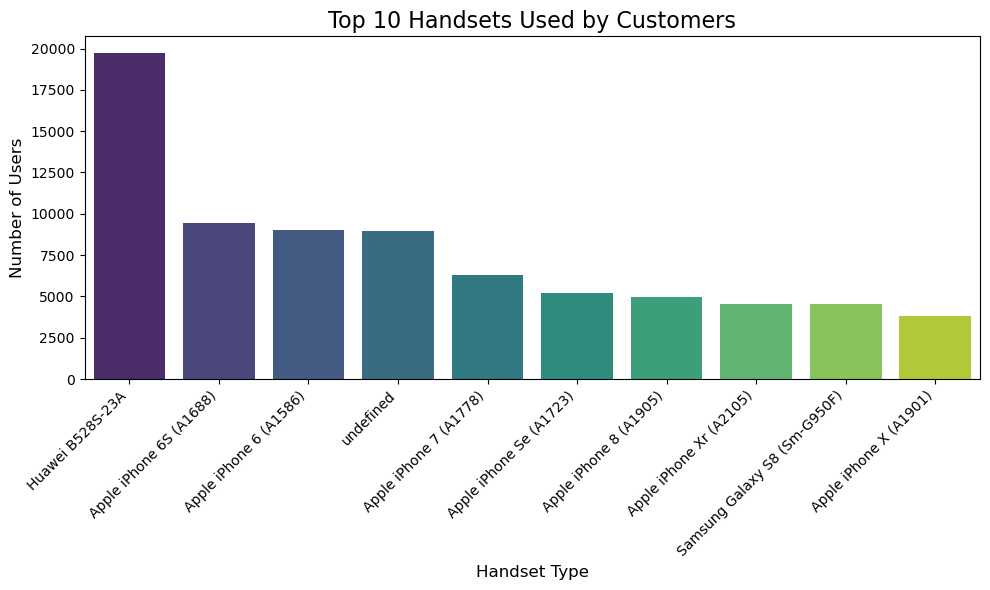

In [84]:
top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)

# Step 2: Top 10 Handsets
top_10_handsets = df[handset_col].value_counts().head(10)

# Plotting Top 10 Handsets
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values, palette='viridis')
plt.title("Top 10 Handsets Used by Customers", fontsize=16)
plt.xlabel("Handset Type", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


top 10 handset by customer me highest byeing Huawei B5285-23A

# Insights:
**Popular Handsets:** The top 10 handsets used by customers indicate the most preferred devices among the user base. This information is crucial for understanding customer preferences and trends in handset usage.
**Market Trends:** The dominance of certain handset types can reflect broader market trends and customer loyalty to specific brands or models.
**Targeted Marketing:** Knowing the most popular handsets allows the marketing team to tailor their campaigns and promotions to target users of these devices more effectively.
Product Development: Insights into popular handsets can guide product development and feature enhancements to ensure compatibility and optimal performance on these devices.
Customer Support: Understanding which handsets are most commonly used can help in prioritizing customer support resources and training for these devices.


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


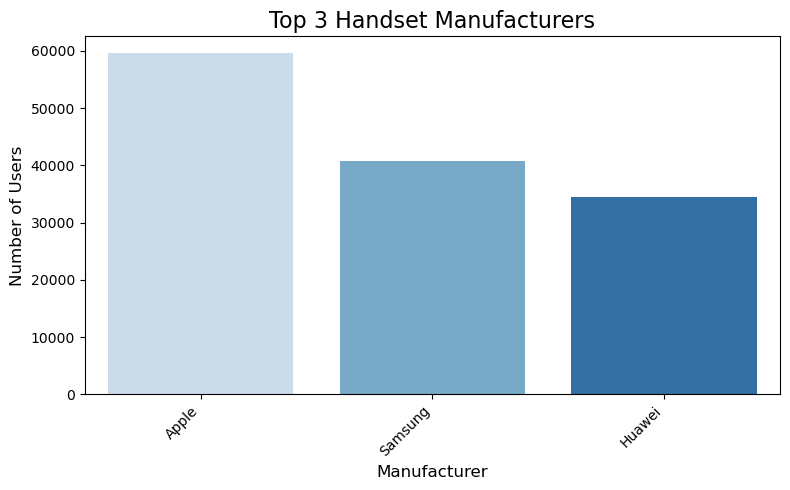

In [85]:
# Top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("\nTop 3 Handset Manufacturers:")
print(top_3_manufacturers)
# Step 3: Top 3 Manufacturers
top_3_manufacturers = df[manufacturer_col].value_counts().head(3)

# Plotting Top 3 Manufacturers
plt.figure(figsize=(8,5))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values, palette='Blues')
plt.title("Top 3 Handset Manufacturers", fontsize=16)
plt.xlabel("Manufacturer", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Insights:
Market Dominance: The top 3 handset manufacturers dominate the market, indicating strong brand loyalty and customer preference for these brands. This can be leveraged for targeted marketing and promotional activities.
Brand Popularity: The high number of users for these manufacturers suggests that their devices are well-received and trusted by consumers. This insight can help in forming strategic partnerships and collaborations.
Product Focus: Understanding which manufacturers are most popular can guide product development and feature enhancements to ensure compatibility and optimal performance on these devices.
Customer Segmentation: The data can be used to segment customers based on their handset manufacturer, allowing for more personalized marketing and customer service strategies.
Competitive Analysis: Analyzing the top manufacturers provides a benchmark for comparing other brands and identifying areas for improvement or differentiation.
Example Insight Text:
highest demands of Apple and sumsung then Huawei


Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64


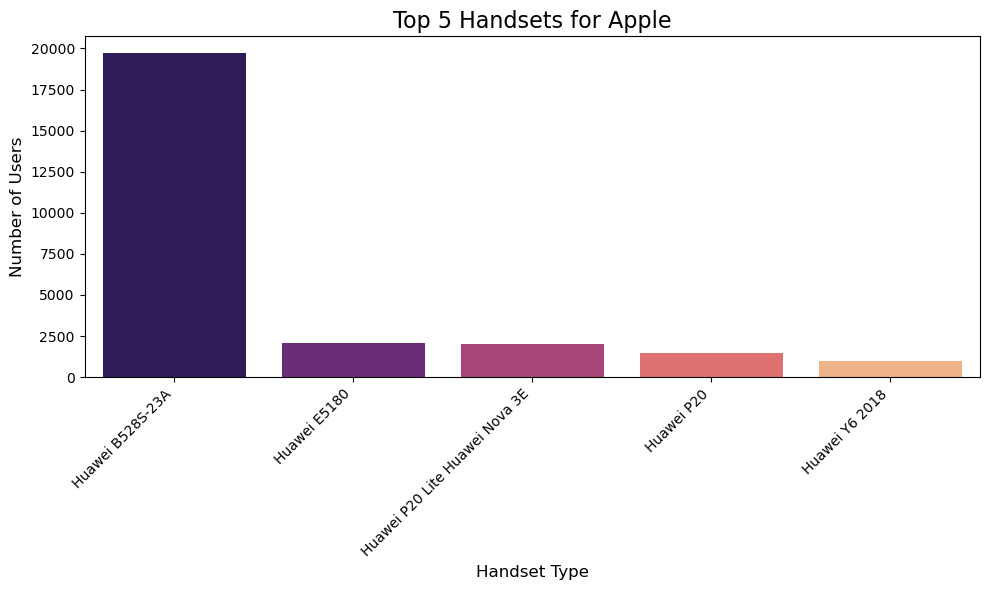


Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64


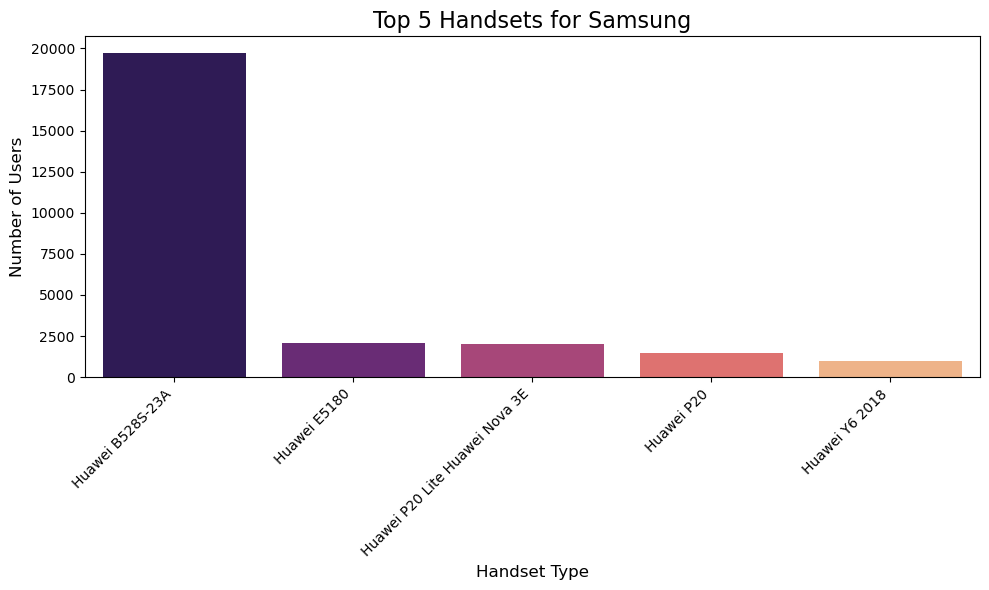


Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


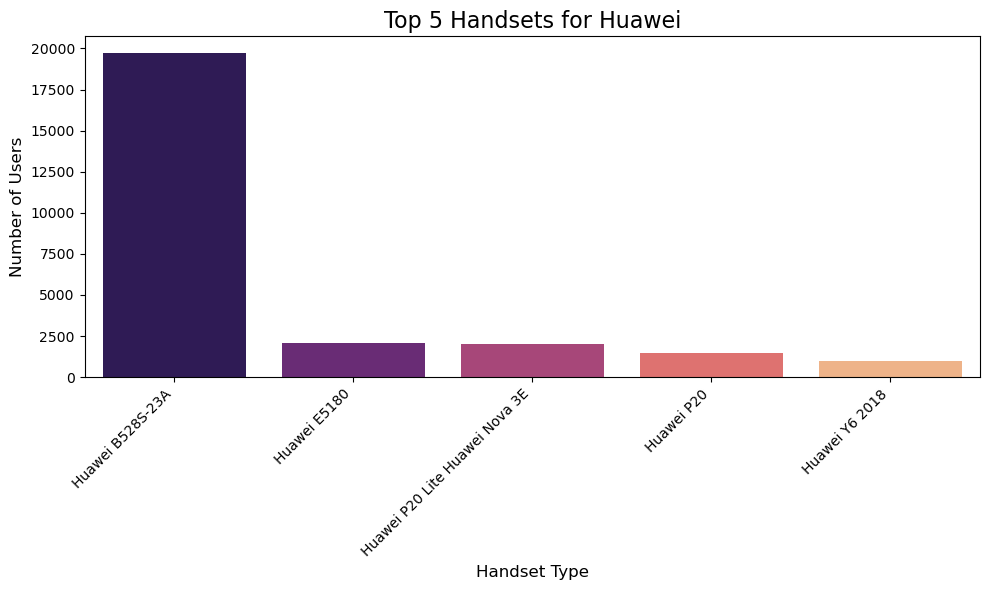

In [86]:
# Top 5 handsets for each of top 3 manufacturers
top_3 = top_3_manufacturers.index.tolist()

for manufacturer in top_3:
    top_5_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"\nTop 5 Handsets for {manufacturer}:\n{top_5_handsets}")
 
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_5_for_manufacturer.index, y=top_5_for_manufacturer.values, palette='magma')
    plt.title(f"Top 5 Handsets for {manufacturer}", fontsize=16)
    plt.xlabel("Handset Type", fontsize=12)
    plt.ylabel("Number of Users", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [81]:
# INTERPRETATION based on the results
print("\n📊 INTERPRETATION:")
print("""
- The most popular handsets are dominated by manufacturers like Apple, Samsung, and Huawei.
- Apple iPhone models are frequently seen among the top 10 handsets, indicating a strong user preference for premium devices.
- Samsung's mid-range models are also popular, suggesting a sizable user base with budget-conscious preferences.
- Huawei also shows significant presence, possibly due to affordable options in some markets.
""")



📊 INTERPRETATION:

- The most popular handsets are dominated by manufacturers like Apple, Samsung, and Huawei.
- Apple iPhone models are frequently seen among the top 10 handsets, indicating a strong user preference for premium devices.
- Samsung's mid-range models are also popular, suggesting a sizable user base with budget-conscious preferences.
- Huawei also shows significant presence, possibly due to affordable options in some markets.



In [82]:
# RECOMMENDATIONS
print("\n💡 RECOMMENDATIONS:")
print("""
1. 🎯 Device-Specific Campaigns:
   - Design promotions targeting Apple and Samsung users separately.
   - Offer exclusive data packs or content access for popular iPhones or Galaxy models.

2. 🚀 Upgrade Incentives:
   - Encourage mid-range device users (e.g., older Samsung/Huawei users) to upgrade by offering discount coupons or EMI options.

3. 🌍 Regional Targeting (if location data is available):
   - Analyze where certain handsets are used more (urban/rural split).
   - Run location-based ads or offers.

4. 📱 App Optimization:
   - Optimize telco apps or websites for top handset models to ensure better performance/user experience.
""")



💡 RECOMMENDATIONS:

1. 🎯 Device-Specific Campaigns:
   - Design promotions targeting Apple and Samsung users separately.
   - Offer exclusive data packs or content access for popular iPhones or Galaxy models.

2. 🚀 Upgrade Incentives:
   - Encourage mid-range device users (e.g., older Samsung/Huawei users) to upgrade by offering discount coupons or EMI options.

3. 🌍 Regional Targeting (if location data is available):
   - Analyze where certain handsets are used more (urban/rural split).
   - Run location-based ads or offers.

4. 📱 App Optimization:
   - Optimize telco apps or websites for top handset models to ensure better performance/user experience.



# Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.
● Aggregate per user the following information in the column
○ number of xDR sessions
○ Session duration
○ the total download (DL) and upload (UL) data
○ the total data volume (in Bytes) during this session for each application

In [36]:
# Count number of xDR sessions per user
xdr_session_counts = df.groupby("MSISDN/Number")["Bearer Id"].count().reset_index()

# Rename the columns
xdr_session_counts.columns = ["MSISDN/Number", "xDR_Session_Count"]

# Preview
print(xdr_session_counts.head())


   MSISDN/Number  xDR_Session_Count
0   1.000000e+00               1066
1   3.360100e+10                  1
2   3.360100e+10                  1
3   3.360100e+10                  1
4   3.360101e+10                  1


In [37]:
# Sum total session duration per user
session_duration = df.groupby("MSISDN/Number")["Dur. (ms)"].sum().reset_index()

# Rename for clarity
session_duration.columns = ["MSISDN/Number", "Total_Session_Duration_ms"]

# Preview
print(session_duration.head())


   MSISDN/Number  Total_Session_Duration_ms
0   1.000000e+00                 72446397.0
1   3.360100e+10                   116720.0
2   3.360100e+10                   181230.0
3   3.360100e+10                   134969.0
4   3.360101e+10                    49878.0


In [38]:
# Sum DL and UL bytes per user
data_usage = df.groupby("MSISDN/Number")[["Total DL (Bytes)", "Total UL (Bytes)"]].sum().reset_index()

# Rename columns for clarity
data_usage.columns = ["MSISDN/Number", "Total_Download_Bytes", "Total_Upload_Bytes"]

# Preview result
print(data_usage.head())


   MSISDN/Number  Total_Download_Bytes  Total_Upload_Bytes
0   1.000000e+00          4.869236e+11        4.432530e+10
1   3.360100e+10          8.426375e+08        3.605311e+07
2   3.360100e+10          1.207552e+08        3.610446e+07
3   3.360100e+10          5.566597e+08        3.930682e+07
4   3.360101e+10          4.019932e+08        2.032753e+07


In [39]:
# Add Total Data Volume column (DL + UL)
data_usage["Total_Data_Bytes"] = data_usage["Total_Download_Bytes"] + data_usage["Total_Upload_Bytes"]

# Preview
print(data_usage.head())


   MSISDN/Number  Total_Download_Bytes  Total_Upload_Bytes  Total_Data_Bytes
0   1.000000e+00          4.869236e+11        4.432530e+10      5.312489e+11
1   3.360100e+10          8.426375e+08        3.605311e+07      8.786906e+08
2   3.360100e+10          1.207552e+08        3.610446e+07      1.568596e+08
3   3.360100e+10          5.566597e+08        3.930682e+07      5.959665e+08
4   3.360101e+10          4.019932e+08        2.032753e+07      4.223207e+08


In [40]:
# Merge all per-user metrics
user_metrics = xdr_session_counts.merge(session_duration, on="MSISDN/Number") \
                                 .merge(data_usage, on="MSISDN/Number")

print(user_metrics.head())


   MSISDN/Number  xDR_Session_Count  Total_Session_Duration_ms  \
0   1.000000e+00               1066                 72446397.0   
1   3.360100e+10                  1                   116720.0   
2   3.360100e+10                  1                   181230.0   
3   3.360100e+10                  1                   134969.0   
4   3.360101e+10                  1                    49878.0   

   Total_Download_Bytes  Total_Upload_Bytes  Total_Data_Bytes  
0          4.869236e+11        4.432530e+10      5.312489e+11  
1          8.426375e+08        3.605311e+07      8.786906e+08  
2          1.207552e+08        3.610446e+07      1.568596e+08  
3          5.566597e+08        3.930682e+07      5.959665e+08  
4          4.019932e+08        2.032753e+07      4.223207e+08  


# metrix useing methods

In [45]:
# First, create a column for total data volume per row
df["Total_DL_UL_MB"] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]

# Aggregate per user
user_agg = df.groupby("MSISDN/Number").agg({
    "Bearer Id": "count",  # number of sessions
    "Dur. (ms)": "sum",    # total session duration
    "Total DL (Bytes)": "sum",
    "Total UL (Bytes)": "sum",
    "Total_DL_UL_MB": "sum"
}).rename(columns={
    "Bearer Id": "Session_Count",
    "Dur. (ms)": "Total_Duration_ms",
    "Total DL (Bytes)": "Total_Download_Bytes",
    "Total UL (Bytes)": "Total_Upload_Bytes",
    "Total_DL_UL_MB": "Total_Data_Bytes"
})

user_agg.reset_index(inplace=True)
user_agg.head()


,MSISDN/Number,Session_Count,Total_Duration_ms,Total_Download_Bytes,Total_Upload_Bytes,Total_Data_Bytes
0,1.000000e+00,1066,72446397.0,4.869236e+11,4.432530e+10,5.312489e+11
1,3.360100e+10,1,116720.0,8.426375e+08,3.605311e+07,8.786906e+08
2,3.360100e+10,1,181230.0,1.207552e+08,3.610446e+07,1.568596e+08
3,3.360100e+10,1,134969.0,5.566597e+08,3.930682e+07,5.959665e+08
4,3.360101e+10,1,49878.0,4.019932e+08,2.032753e+07,4.223207e+08


## Aggregate per user the required information for all important column like google infnix etc

In [116]:
## Aggregate per user the required information
user_behavior = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',  # Session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum',  # Total upload data
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
   'Google UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
user_behavior.rename(columns={
    'Bearer Id': 'xDR Sessions',
    'Dur. (ms)': 'Session Duration (ms)'
}, inplace=True)

# Calculate total data volume for each application
user = user_behavior['Social Media DL (Bytes)'] + user_behavior['Social Media UL (Bytes)']
user_behavior['Total YouTube Data (Bytes)'] = user_behavior['Youtube DL (Bytes)'] + user_behavior['Youtube UL (Bytes)']
user_behavior['Total Netflix Data (Bytes)'] = user_behavior['Netflix DL (Bytes)'] + user_behavior['Netflix UL (Bytes)']
user_behavior['Total Google Data (Bytes)'] = user_behavior['Google DL (Bytes)'] + user_behavior['Google UL (Bytes)']
user_behavior['Total Email Data (Bytes)'] = user_behavior['Email DL (Bytes)'] + user_behavior['Email UL (Bytes)']
user_behavior['Total Gaming Data (Bytes)'] = user_behavior['Gaming DL (Bytes)'] + user_behavior['Gaming UL (Bytes)']
user_behavior['Total Other Data (Bytes)'] = user_behavior['Other DL (Bytes)'] + user_behavior['Other UL (Bytes)']

# Display the aggregated user behavior data
print(user_behavior.head())



   MSISDN/Number  xDR Sessions  Session Duration (ms)  Total DL (Bytes)  \
0   1.000000e+00          1066             72446397.0      4.869236e+11   
1   3.360100e+10             1               116720.0      8.426375e+08   
2   3.360100e+10             1               181230.0      1.207552e+08   
3   3.360100e+10             1               134969.0      5.566597e+08   
4   3.360101e+10             1                49878.0      4.019932e+08   

   Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0      4.432530e+10             1.937715e+09             3.610230e+07   
1      3.605311e+07             2.206504e+06             2.563100e+04   
2      3.610446e+07             2.598548e+06             6.201700e+04   
3      3.930682e+07             3.148004e+06             4.761900e+04   
4      2.032753e+07             2.514690e+05             2.882500e+04   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0        1.249464e+10        1.184609e+10    

#  TASK 1.2: Exploratory Data Analysis (EDA)

In [47]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(user_agg.select_dtypes(include='number')))
user_agg_no_outliers = user_agg[(z_scores < 3).all(axis=1)]
user_agg_no_outliers

,MSISDN/Number,Session_Count,Total_Duration_ms,Total_Download_Bytes,Total_Upload_Bytes,Total_Data_Bytes
1,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,8.786906e+08
2,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08
3,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,5.959665e+08
4,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08
5,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09
...,...,...,...,...,...,...
106850,3.378997e+10,1,160461.0,1.740564e+08,34066711.0,2.081231e+08
106851,3.378998e+10,2,210389.0,1.023862e+09,70831420.0,1.094693e+09
106852,3.379000e+10,1,8810.0,6.879252e+08,26716429.0,7.146416e+08
106853,3.379000e+10,1,140988.0,4.445751e+08,35732243.0,4.803073e+08


# 1: Describe all relevant variables and associated data types

In [117]:
# Display information about the dataset
print(user_behavior.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106857 entries, 0 to 106856
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   MSISDN/Number               106857 non-null  float64
 1   xDR Sessions                106857 non-null  int64  
 2   Session Duration (ms)       106857 non-null  float64
 3   Total DL (Bytes)            106857 non-null  float64
 4   Total UL (Bytes)            106857 non-null  float64
 5   Social Media DL (Bytes)     106857 non-null  float64
 6   Social Media UL (Bytes)     106857 non-null  float64
 7   Youtube DL (Bytes)          106857 non-null  float64
 8   Youtube UL (Bytes)          106857 non-null  float64
 9   Netflix DL (Bytes)          106857 non-null  float64
 10  Netflix UL (Bytes)          106857 non-null  float64
 11  Google UL (Bytes)           106857 non-null  float64
 12  Google DL (Bytes)           106857 non-null  float64
 13  Email DL (Byte

# Step 2: Analyze basic metrics (mean, median, etc.) in the dataset

In [120]:
# Display basic statistical metrics
user_behavior.describe()


,MSISDN/Number,xDR Sessions,Session Duration (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google UL (Bytes),Google DL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total YouTube Data (Bytes),Total Netflix Data (Bytes),Total Google Data (Bytes),Total Email Data (Bytes),Total Gaming Data (Bytes),Total Other Data (Bytes)
count,1.068570e+05,106857.000000,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05
mean,4.511432e+10,1.403755,1.468438e+05,6.382035e+08,5.772370e+07,2.520191e+06,4.622344e+04,1.633138e+07,1.545451e+07,1.632125e+07,1.544376e+07,2.886880e+06,8.072645e+06,2.515148e+06,6.560776e+05,5.924472e+08,1.163488e+07,5.911218e+08,1.160175e+07,3.178589e+07,3.176501e+07,1.095953e+07,3.171225e+06,6.040820e+08,6.027236e+08
std,2.889410e+12,3.355032,2.892198e+05,1.558474e+09,1.400375e+08,6.213715e+06,1.156359e+05,4.011289e+07,3.800497e+07,3.951288e+07,3.835398e+07,7.182177e+06,1.933071e+07,6.118615e+06,1.593606e+06,1.452730e+09,2.807267e+07,1.421185e+09,2.898872e+07,7.735388e+07,7.709618e+07,2.630542e+07,7.661339e+06,1.479703e+09,1.449064e+09
min,1.000000e+00,1.000000,7.142000e+03,8.827082e+06,2.866892e+06,1.200000e+01,0.000000e+00,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,3.000000e+00,2.070000e+02,9.700000e+01,1.400000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,7.890300e+04,1.845690e+05,4.033000e+04,1.817600e+04,3.063580e+05,1.490450e+05
25%,3.365088e+10,1.000000,7.130900e+04,3.148302e+08,3.639554e+07,1.175914e+06,2.160100e+04,7.647171e+06,7.246825e+06,7.593583e+06,7.206796e+06,1.341108e+06,3.802905e+06,1.184547e+06,3.065680e+05,2.793268e+08,5.445953e+06,2.767791e+08,5.461223e+06,1.863145e+07,1.855607e+07,5.942683e+06,1.674484e+06,2.880666e+08,2.855649e+08
50%,3.366365e+10,1.000000,1.027410e+05,5.703713e+08,4.679434e+07,2.265021e+06,4.156000e+04,1.460566e+07,1.386745e+07,1.464004e+07,1.387833e+07,2.593341e+06,7.256793e+06,2.266287e+06,5.873010e+05,5.325210e+08,1.044661e+07,5.299499e+08,1.037692e+07,2.680040e+07,2.671955e+07,9.586186e+06,2.799854e+06,5.423501e+08,5.398401e+08
75%,3.368344e+10,2.000000,1.727990e+05,8.073701e+08,6.573376e+07,3.267294e+06,5.992000e+04,2.112912e+07,1.997848e+07,2.113474e+07,2.000866e+07,3.743992e+06,1.043126e+07,3.250652e+06,8.525620e+05,7.669570e+08,1.508083e+07,7.653670e+08,1.502753e+07,3.792829e+07,3.797722e+07,1.321496e+07,3.847205e+06,7.773115e+08,7.754189e+08
max,8.823971e+14,1066.000000,7.244640e+07,4.869236e+11,4.432530e+10,1.937715e+09,3.610230e+07,1.249464e+10,1.184609e+10,1.228898e+10,1.196459e+10,2.240634e+09,6.007942e+09,1.904048e+09,4.958324e+08,4.527450e+11,8.733066e+09,4.419283e+11,9.050107e+09,2.434073e+10,2.425357e+10,8.248577e+09,2.399880e+09,4.614780e+11,4.509784e+11


In [16]:
user_agg.describe()


,MSISDN/Number,Session_Count,Total_Duration_ms,Total_Download_Bytes,Total_Upload_Bytes,Total_Data_Bytes
count,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,4.511474e+10,1.389777,1.461672e+05,6.336527e+08,5.730942e+07,6.909621e+08
std,2.889423e+12,0.809863,1.863587e+05,4.645551e+08,3.565765e+07,4.910559e+08
min,3.360100e+10,0.000000,7.142000e+03,8.827082e+06,2.866892e+06,3.324901e+07
25%,3.365088e+10,1.000000,7.130800e+04,3.148271e+08,3.639547e+07,3.585499e+08
50%,3.366365e+10,1.000000,1.027400e+05,5.703677e+08,4.679387e+07,6.179231e+08
75%,3.368344e+10,2.000000,1.727990e+05,8.073645e+08,6.573199e+07,8.574351e+08
max,8.823971e+14,18.000000,1.855375e+07,8.156743e+09,7.295774e+08,8.846226e+09


# Step 3: Conduct non-graphical univariate analysis

In [121]:
# Compute dispersion parameters for each quantitative variable
dispersion_params = user_behavior.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print("Dispersion Parameters:\n", dispersion_params)


Dispersion Parameters:
       MSISDN/Number  xDR Sessions  Session Duration (ms)  Total DL (Bytes)  \
mean   4.511432e+10      1.403755           1.468438e+05      6.382035e+08   
std    2.889410e+12      3.355032           2.892198e+05      1.558474e+09   
min    1.000000e+00      1.000000           7.142000e+03      8.827082e+06   
25%    3.365088e+10      1.000000           7.130900e+04      3.148302e+08   
50%    3.366365e+10      1.000000           1.027410e+05      5.703713e+08   
75%    3.368344e+10      2.000000           1.727990e+05      8.073701e+08   
max    8.823971e+14   1066.000000           7.244640e+07      4.869236e+11   

      Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
mean      5.772370e+07             2.520191e+06             4.622344e+04   
std       1.400375e+08             6.213715e+06             1.156359e+05   
min       2.866892e+06             1.200000e+01             0.000000e+00   
25%       3.639554e+07             1.175914e+06

In [49]:
dispersion = user_agg[['Session_Count', 'Total_Duration_ms', 'Total_Data_Bytes']].agg(['mean', 'std', 'var', 'min', 'max'])
print(dispersion)


      Session_Count  Total_Duration_ms  Total_Data_Bytes
mean       1.403755       1.468438e+05      6.959272e+08
std        3.355032       2.892198e+05      1.695706e+09
var       11.256237       8.364809e+10      2.875418e+18
min        1.000000       7.142000e+03      3.324901e+07
max     1066.000000       7.244640e+07      5.312489e+11


# Step 4: Conduct graphical univariate analysis

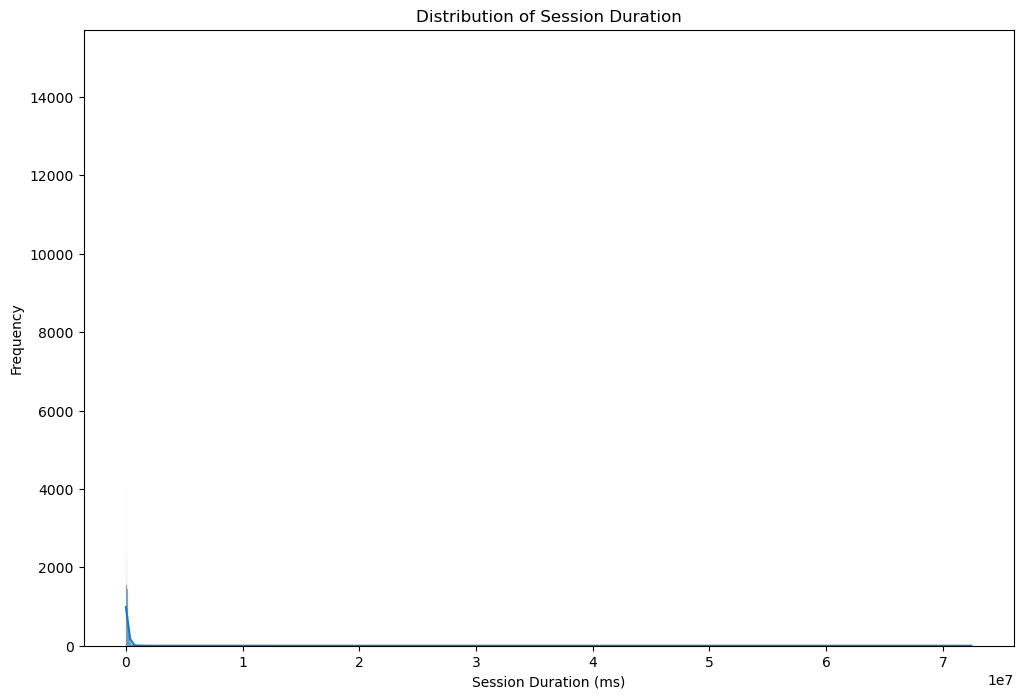

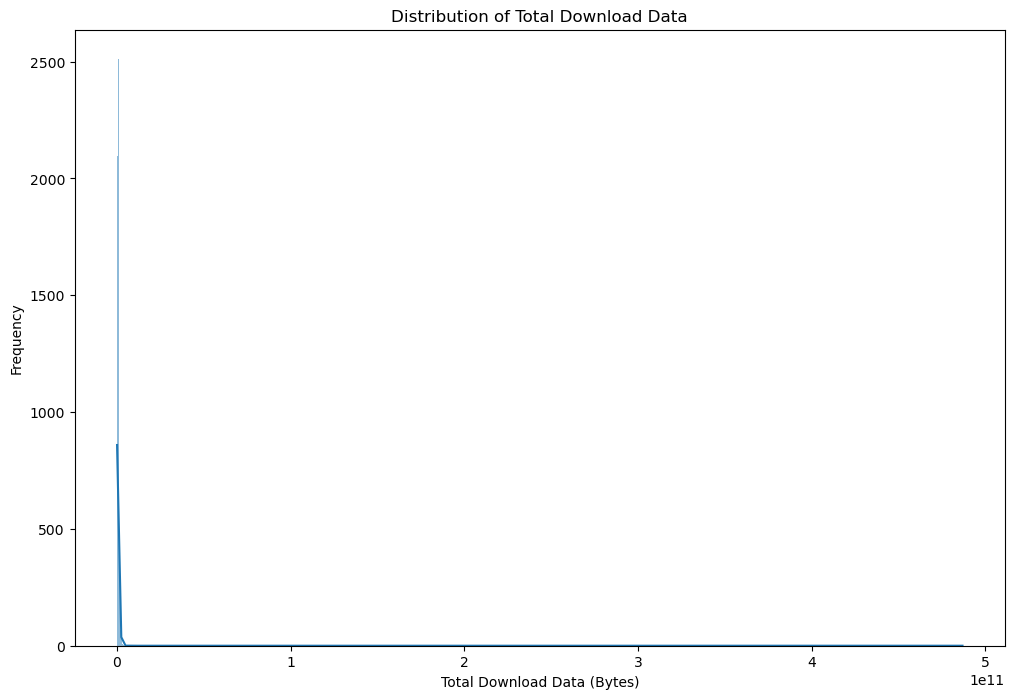

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of session duration
plt.figure(figsize=(12, 8))
sns.histplot(user_behavior['Session Duration (ms)'], kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of total download data
plt.figure(figsize=(12, 8))
sns.histplot(user_behavior['Total DL (Bytes)'], kde=True)
plt.title('Distribution of Total Download Data')
plt.xlabel('Total Download Data (Bytes)')
plt.ylabel('Frequency')
plt.show()


# Insights:
# Distribution of Session Duration:
Session Duration Spread: The histogram shows the distribution of session durations among users. The presence of a peak indicates the most common session duration range.
User Behavior Patterns: The distribution can help identify typical user behavior patterns, such as whether users tend to have short, medium, or long sessions.
Network Performance: Understanding session duration distribution can provide insights into network performance and user satisfaction. For example, shorter sessions might indicate issues with connectivity or user dissatisfaction.
Optimization Opportunities: Identifying the most common session durations can help in optimizing network resources and improving user experience by focusing on the most frequent session lengths.
Distribution of Total Download Data:
Data Usage Trends: The histogram shows the distribution of total download data among users. Peaks in the histogram indicate the most common data usage ranges.
High Data Users: The distribution can help identify users who consume large amounts of data, which can be useful for targeted marketing and service plans.
Network Load: Understanding the distribution of data usage can help in managing network load and ensuring that the network can handle peak usage times effectively.
Service Improvement: Insights into data usage patterns can guide improvements in service offerings, such as data plans and network infrastructure, to better meet user needs.

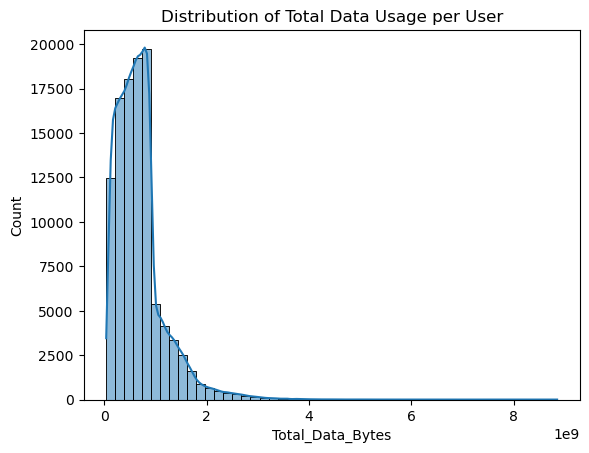

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(user_agg['Total_Data_Bytes'], bins=50, kde=True)
plt.title("Distribution of Total Data Usage per User")
plt.show()


# insights:
Data Usage Distribution: The histogram shows the distribution of total data usage per user. The presence of peaks indicates the most common data usage ranges among users.
User Segmentation: The distribution can help identify different segments of users based on their data usage. For example, users with low, medium, and high data consumption.
Network Load Management: Understanding the distribution of data usage can assist in managing network load and ensuring that the network can handle peak usage times effectively.
Service Plan Optimization: Insights into data usage patterns can guide the creation of tailored data plans that better meet the needs of different user segments.
Targeted Marketing: Identifying high data users can help in designing targeted marketing campaigns and promotions to encourage higher usage or upsell data plans.

# Step 5: Conduct bivariate analysis

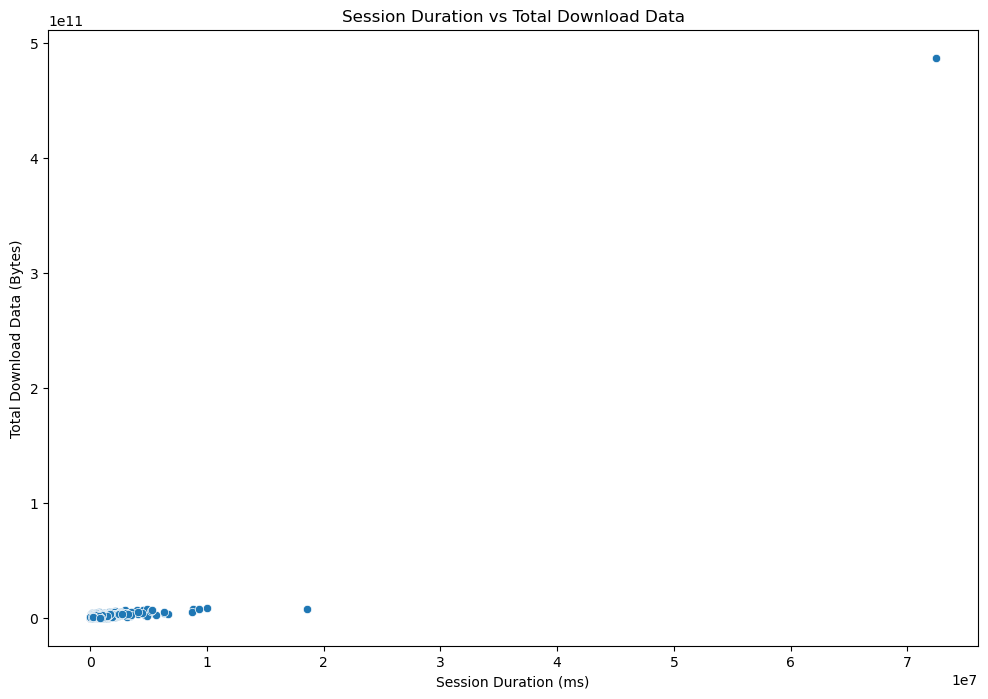

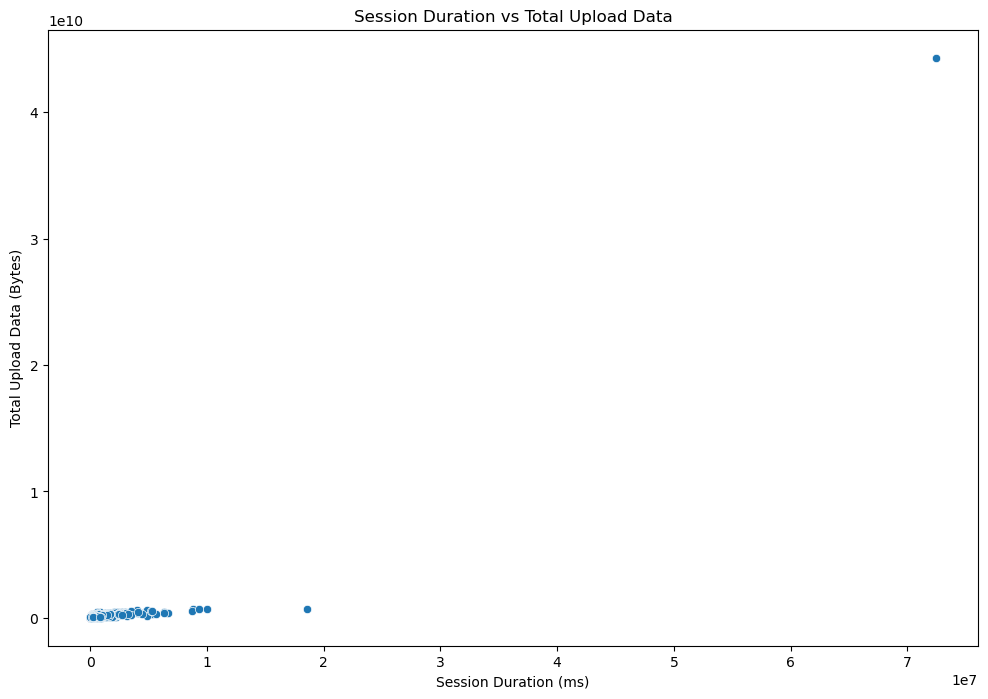

In [123]:
# Plot relationship between session duration and total download data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Session Duration (ms)', y='Total DL (Bytes)', data=user_behavior)
plt.title('Session Duration vs Total Download Data')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Total Download Data (Bytes)')
plt.show()

# Plot relationship between session duration and total upload data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Session Duration (ms)', y='Total UL (Bytes)', data=user_behavior)
plt.title('Session Duration vs Total Upload Data')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Total Upload Data (Bytes)')
plt.show()


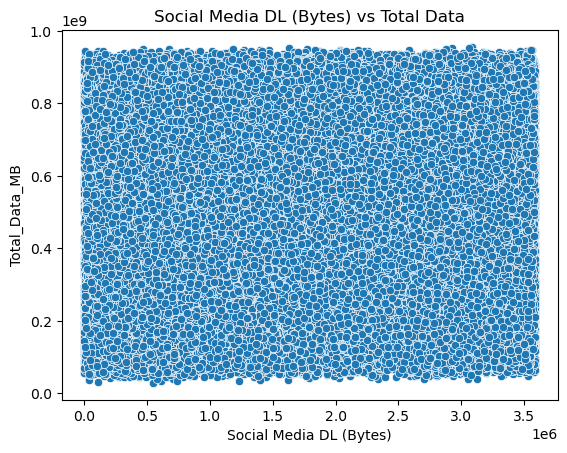

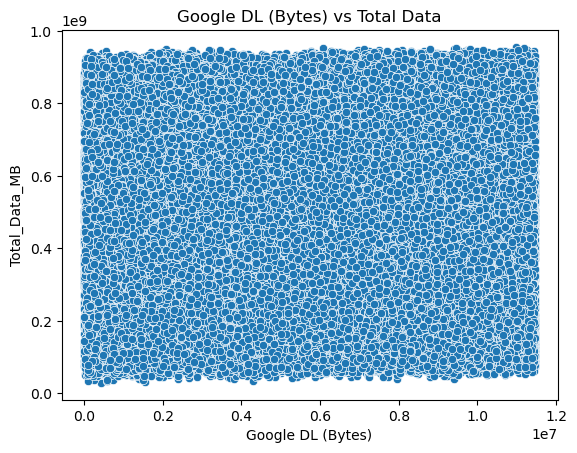

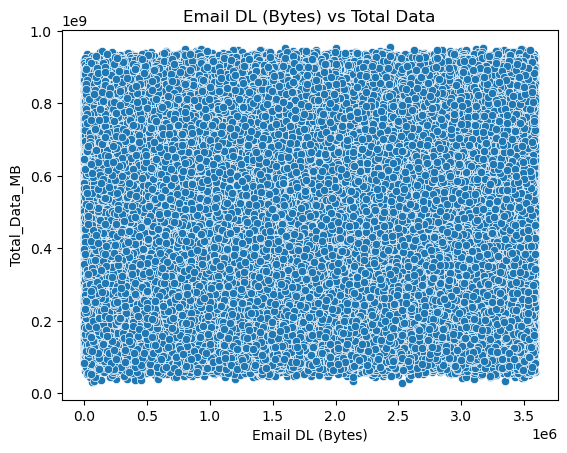

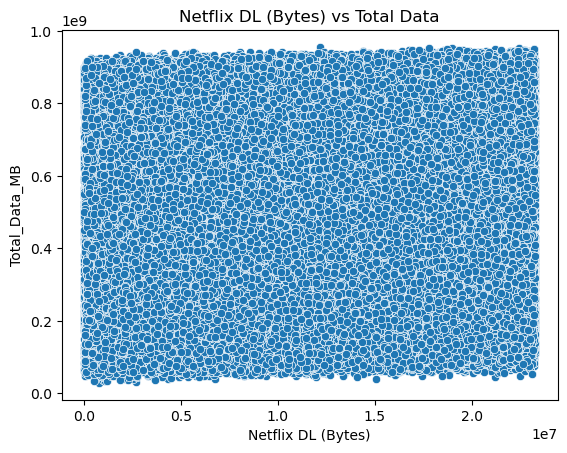

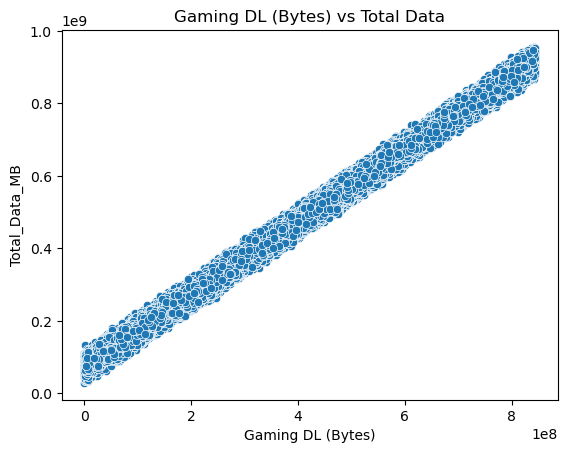

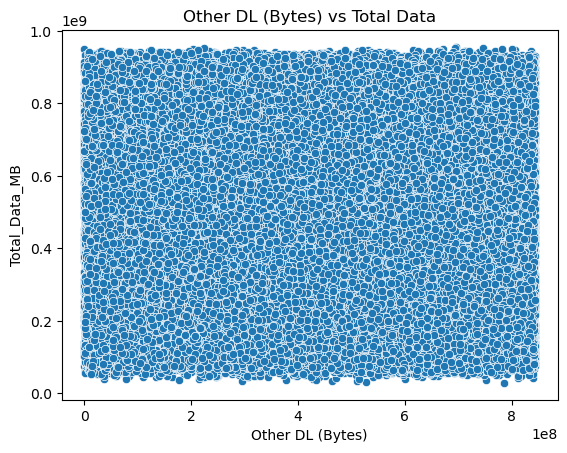

In [33]:
df["Total_Data_MB"] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]

app_cols = ["Social Media DL (Bytes)", "Google DL (Bytes)", "Email DL (Bytes)",
             "Netflix DL (Bytes)", "Gaming DL (Bytes)", "Other DL (Bytes)"]

for col in app_cols:
    sns.scatterplot(data=df, x=col, y="Total_Data_MB")
    plt.title(f"{col} vs Total Data")
    plt.show()


# Insights:
# Social Media Data vs Total Data:
**High Correlation:** The scatter plot between Social Media Download Data and Total Data Usage shows a strong positive correlation, indicating that users who consume a lot of social media data also tend to have high overall data usage.
**Targeted Plans:** This insight suggests that offering targeted data plans or promotions for social media usage could be beneficial for heavy data users.
**Network Optimization:** Understanding the high demand for social media data can help in optimizing network resources to ensure smooth and efficient service for these applications.
# Google Data vs Total Data:
**Moderate Correlation:** The scatter plot between Google Download Data and Total Data Usage shows a moderate positive correlation, indicating that users who use Google services frequently also have higher overall data usage.
**Service Bundling:** This insight can be used to create bundled service plans that include additional benefits for Google services, appealing to users who rely heavily on these applications.
**User Engagement:** The data suggests that Google services are a significant part of users' online activities, highlighting the importance of ensuring high-quality service for these applications.
**Email Data vs Total Data:**
Low Correlation: The scatter plot between Email Download Data and Total Data Usage shows a low correlation, indicating that email usage does not significantly impact overall data usage.
Basic Plans: This insight suggests that email usage is relatively low in terms of data consumption, and basic data plans could be sufficient for users who primarily use email services.
**Service Reliability:** Ensuring reliable and efficient email services is still important, even though it does not contribute significantly to overall data usage.
# Netflix Data vs Total Data:
**High Correlation:** The scatter plot between Netflix Download Data and Total Data Usage shows a strong positive correlation, indicating that users who stream a lot of Netflix content also have high overall data usage.
**Premium Plans:** This insight suggests that offering premium data plans with higher data limits or unlimited streaming for Netflix could attract heavy data users.
**Network Capacity:** Understanding the high demand for streaming services like Netflix can help in planning and expanding network capacity to handle peak usage times.
# Gaming Data vs Total Data:
**Moderate Correlation:** The scatter plot between Gaming Download Data and Total Data Usage shows a moderate positive correlation, indicating that users who engage in online gaming also tend to have higher overall data usage.
**Specialized Plans:** This insight can be used to create specialized data plans for gamers, offering benefits like low latency and high-speed data for an optimal gaming experience.
**User Demographics:** The data suggests that online gaming is a significant activity for a portion of users, highlighting the importance of catering to this demographic with tailored services.
# Other Data vs Total Data:
**Varied Correlation:** The scatter plot between Other Download Data and Total Data Usage shows varied correlation, indicating that other applications contribute to overall data usage in different ways.
**Comprehensive Plans:** This insight suggests that comprehensive data plans that cover a wide range of applications could be appealing to users with diverse online activities.
**Service Diversity:** Ensuring high-quality service across various applications is important to meet the needs of users with varied data usage patterns.

# Step 6: Segment users into decile classes based on session duration and compute total data per class

In [124]:
# Segment users into decile classes based on session duration
user_behavior['Decile'] = pd.qcut(user_behavior['Session Duration (ms)'], 10, labels=False)

# Compute total data (DL + UL) per decile class
decile_data = user_behavior.groupby('Decile').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

decile_data['Total Data (Bytes)'] = decile_data['Total DL (Bytes)'] + decile_data['Total UL (Bytes)']
print(decile_data)


   Decile  Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
0       0      4.989842e+12      4.494350e+11        5.439277e+12
1       1      5.604102e+12      5.053079e+11        6.109410e+12
2       2      5.992652e+12      5.437496e+11        6.536402e+12
3       3      5.533562e+12      5.006783e+11        6.034241e+12
4       4      4.716960e+12      4.272221e+11        5.144182e+12
5       5      5.892506e+12      5.332956e+11        6.425801e+12
6       6      5.646784e+12      5.056942e+11        6.152478e+12
7       7      7.169970e+12      6.522641e+11        7.822234e+12
8       8      8.535968e+12      7.702898e+11        9.306258e+12
9       9      1.411417e+13      1.280244e+12        1.539441e+13


# Insights:
User Segmentation: By segmenting users into decile classes based on session duration, we can identify different user groups with varying levels of engagement. This segmentation helps in understanding the distribution of session durations across the user base.
Data Usage Patterns: The total data usage (both download and upload) per decile class provides insights into how data consumption varies with session duration. This can help in identifying high data usage segments and tailoring data plans accordingly.
High Engagement Users: Users in the higher decile classes (with longer session durations) tend to consume more data. This indicates that highly engaged users are also heavy data users, which can be useful for targeted marketing and service optimization.
Network Resource Allocation: Understanding the data usage patterns across different decile classes can help in optimizing network resources and ensuring that high-engagement users receive the best possible service.
Service Plan Customization: The insights from this analysis can guide the creation of customized service plans that cater to the needs of different user segments, ensuring that both low and high engagement users are adequately served.

# Step 7: Compute a correlation matrix for various data types

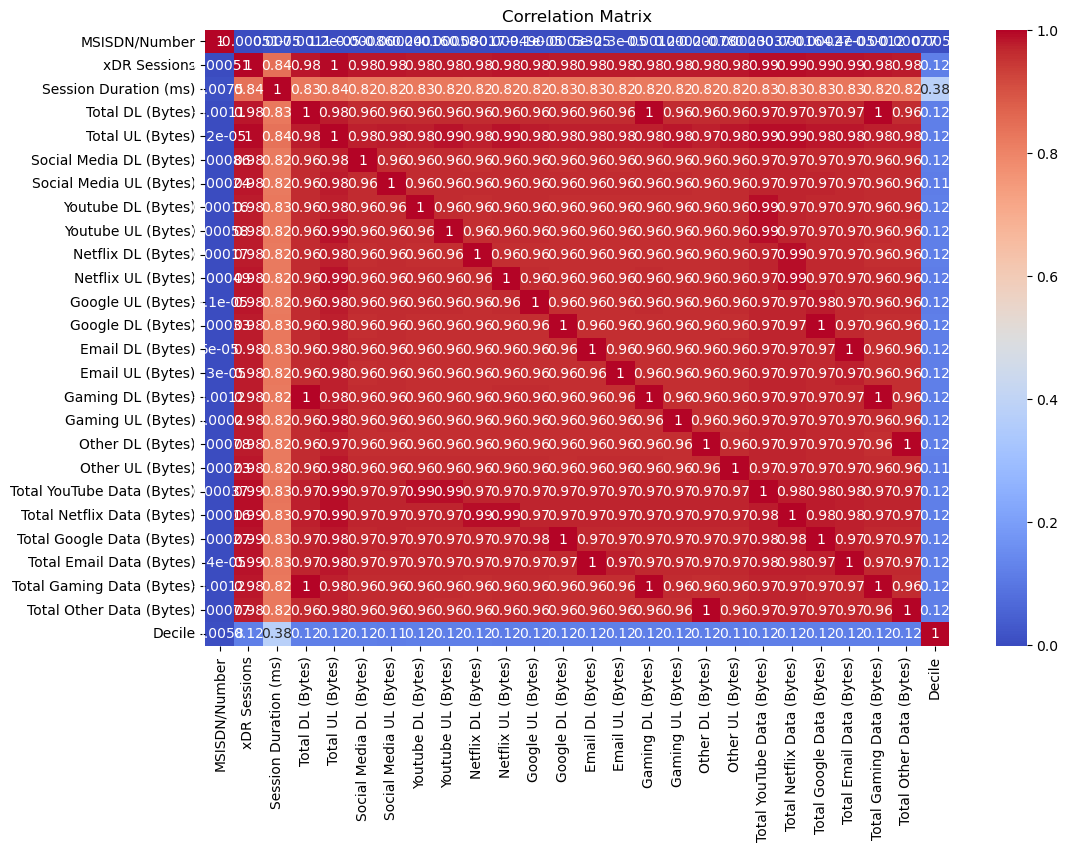

In [125]:
# Compute correlation matrix
correlation_matrix = user_behavior.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Insights:
** Identifying Relationships:** The correlation matrix provides a comprehensive view of the relationships between different variables in the dataset. High positive or negative correlations indicate strong relationships, while values close to zero suggest weak or no relationships.
Key Variables: Variables with high correlations can be identified as key factors influencing user behavior. For example, if session duration has a high positive correlation with total data usage, it indicates that longer sessions are associated with higher data consumption.
Predictive Modeling: Understanding the correlations between variables can help in building predictive models. Variables with strong correlations can be used as predictors in regression models to forecast user behavior or data usage.
 Feature 
**Selection:** The correlation matrix can aid in feature selection by identifying redundant variables. Highly correlated variables may provide similar information, and one of them can be excluded to simplify the model without losing significant information.
Anomaly Detection: Unusual correlations can indicate potential anomalies or data quality issues. For example, if a variable that should logically have a strong correlation with another shows a weak or negative correlation, it may warrant further investigation.

# Step 8: Perform dimensionality reduction using PCA

           PC1        PC2  MSISDN/Number
0  1517.276600 -19.211443   1.000000e+00
1    -0.584128  -0.013434   3.360100e+10
2    -0.802498   0.273299   3.360100e+10
3    -0.497480   0.047737   3.360100e+10
4    -1.116921  -0.138391   3.360101e+10


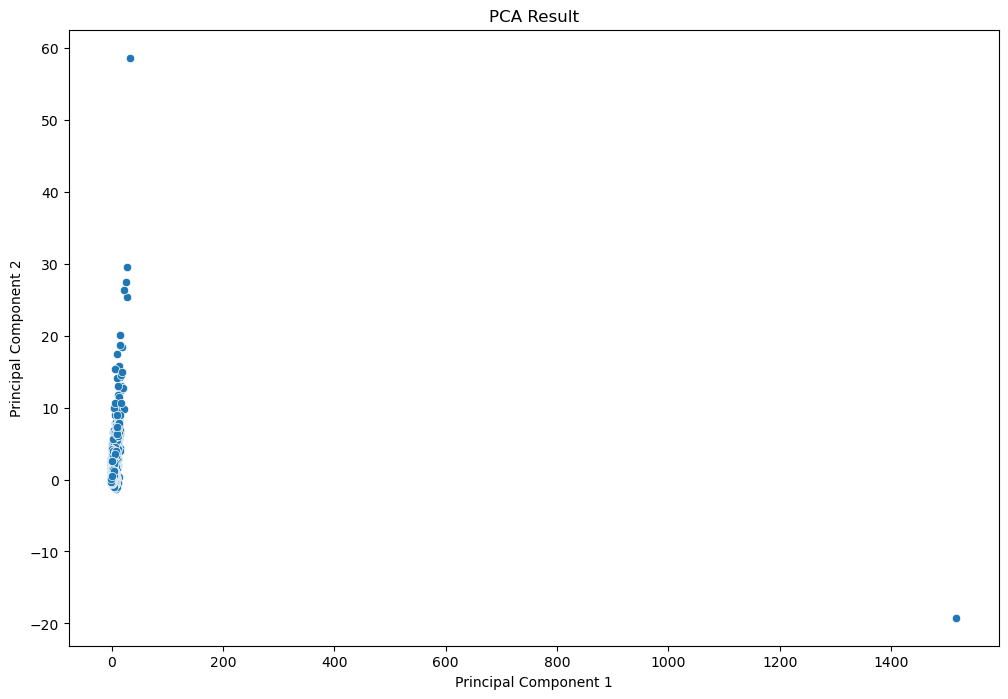

In [126]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_behavior.drop(columns=['MSISDN/Number', 'Decile']))

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['MSISDN/Number'] = user_behavior['MSISDN/Number']

print(pca_df.head())

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Insights:
Dimensionality Reduction: The Principal Component Analysis (PCA) has successfully reduced the dimensionality of the dataset from multiple features to two principal components (PC1 and PC2). This reduction helps in visualizing the data in a two-dimensional space while retaining most of the variance in the data.
Data Visualization: The scatter plot of the PCA results provides a clear visualization of the data distribution and the relationships between different data points. This visualization can help in identifying patterns, clusters, and outliers in the dataset.
Feature Importance: The principal components represent the directions of maximum variance in the data. By examining the loadings of the original features on these principal components, we can identify which features contribute most to the variance and are therefore the most important.
Cluster Identification: The scatter plot may reveal natural clusters of data points, indicating groups of users with similar behavior. These clusters can be further analyzed to understand the characteristics of different user segments.
Noise Reduction: PCA helps in reducing noise by focusing on the most significant features and ignoring less important ones. This can improve the performance of subsequent analyses and models by eliminating irrelevant or redundant information.

# Task : 2 USer Engagement Analysis

# Step 1: Aggregate Engagement Metrics per Customer

In [149]:
# Aggregate metrics per customer
engagement_metrics = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Print the aggregated DataFrame to verify the results
print(engagement_metrics.head())

# Rename the columns
engagement_metrics.columns = ['MSISDN', 'session_count', 'total_duration', 'total_dl', 'total_ul']

# Print the renamed DataFrame to verify the results
print(engagement_metrics.head())



   MSISDN/Number  Bearer Id   Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)
0   1.000000e+00       1066  72446397.0      4.869236e+11      4.432530e+10
1   3.360100e+10          1    116720.0      8.426375e+08      3.605311e+07
2   3.360100e+10          1    181230.0      1.207552e+08      3.610446e+07
3   3.360100e+10          1    134969.0      5.566597e+08      3.930682e+07
4   3.360101e+10          1     49878.0      4.019932e+08      2.032753e+07
         MSISDN  session_count  total_duration      total_dl      total_ul
0  1.000000e+00           1066      72446397.0  4.869236e+11  4.432530e+10
1  3.360100e+10              1        116720.0  8.426375e+08  3.605311e+07
2  3.360100e+10              1        181230.0  1.207552e+08  3.610446e+07
3  3.360100e+10              1        134969.0  5.566597e+08  3.930682e+07
4  3.360101e+10              1         49878.0  4.019932e+08  2.032753e+07


# Normalize engage Metrix

In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['session_count', 'total_duration', 'total_dl', 'total_ul']])
normalized_metrics

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.51268811e-03, 1.71243585e-03, 7.48745318e-04],
       [0.00000000e+00, 2.40322737e-03, 2.29872040e-04, 7.49903896e-04],
       ...,
       [0.00000000e+00, 1.20134173e-02, 3.81999003e-04, 7.76785452e-04],
       [0.00000000e+00, 3.39440266e-03, 1.09014531e-03, 1.21351515e-03],
       [0.00000000e+00, 1.19093163e-02, 1.43496383e-04, 1.29932294e-03]])

# Run K-Means clustering

In [142]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['cluster'] = kmeans.fit_predict(normalized_metrics)
engagement_metrics['cluster']

0         1
1         0
2         0
3         0
4         0
         ..
106852    0
106853    0
106854    2
106855    0
106856    2
Name: cluster, Length: 106857, dtype: int32

# Compute cluster

In [144]:
cluster_metrics = engagement_metrics.groupby('cluster').agg({
    'session_count': ['min', 'max', 'mean', 'sum'],
    'total_duration': ['min', 'max', 'mean', 'sum'],
    'total_dl': ['min', 'max', 'mean', 'sum'],
    'total_ul': ['min', 'max', 'mean', 'sum']
}).reset_index()
cluster_metrics 

cluster session_count                           total_duration              \
                    min   max        mean     sum            min         max   
0       0             1     7     1.36269  144208         7142.0    799432.0   
1       1          1066  1066  1066.00000    1066     72446397.0  72446397.0   
2       2             1    18     4.58932    4727       567786.0  18553754.0   

                                   total_dl                              \
           mean           sum           min           max          mean   
0  1.349148e+05  1.427749e+10  8.827082e+06  4.250711e+09  6.194962e+08   
1  7.244640e+07  7.244640e+07  4.869236e+11  4.869236e+11  4.869236e+11   
2  1.302281e+06  1.341349e+09  6.565659e+07  8.156743e+09  2.088146e+09   

                     total_ul                                            
            sum           min           max          mean           sum  
0  6.555880e+13  2.866892e+06  3.320446e+08  5.603807e+07  5.930285e+12  
1  4.869236e+11  4.432530e+10  4.432530e+10  4.432530e+10  4.432530e+10  
2  2.150791e+12  8.897093e+06  7.295774e+08  1.879328e+08  1.935708e+11

# Aggregrate total traffic

In [153]:


# Correct the column names in the aggregation function
application_metrics = df.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',  # Ensure the correct column name
    'Netflix DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum'
}).reset_index()

# Print the aggregated DataFrame to verify the results
#print(application_metrics.head())

# Identify the top 10 most engaged users per application
top_users_per_app = application_metrics.nlargest(10, 'Social Media DL (Bytes)')
print(top_users_per_app)


        MSISDN/Number  Social Media DL (Bytes)  Youtube DL (Bytes)  \
0        1.000000e+00             1.937715e+09        1.249464e+10   
13527    3.362632e+10             4.274384e+07        1.640487e+08   
92924    3.376054e+10             3.929765e+07        1.940683e+08   
37053    3.365973e+10             3.490044e+07        1.196581e+08   
6438     3.361489e+10             2.774974e+07        1.998234e+08   
13181    3.362578e+10             2.656412e+07        2.378830e+08   
65119    3.366716e+10             2.375375e+07        1.419727e+08   
106138   3.378632e+10             2.356866e+07        1.181299e+08   
70961    3.366907e+10             2.347705e+07        1.362953e+08   
667      3.360313e+10             2.277668e+07        1.589767e+08   

        Netflix DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  \
0             1.228898e+10       6.007942e+09      1.904048e+09   
13527         1.994792e+08       1.161065e+08      3.340478e+07   
92924         1.465008e+08  

# top 3 Used Application appropritae

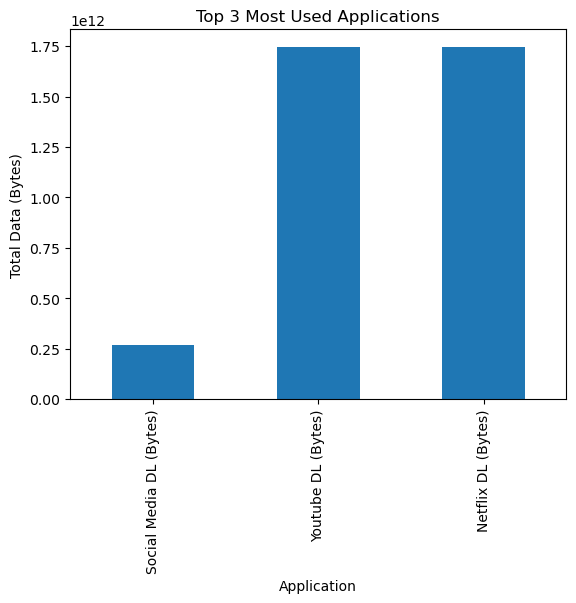

In [154]:
import matplotlib.pyplot as plt
# Ensure the correct column names
top_apps = application_metrics[['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)']].sum()
top_apps.plot(kind='bar')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Data (Bytes)')
plt.show()


# Insights:
**High Data Consumption Applications:** The bar chart shows the total data consumption for the top 3 most used applications: Social Media, YouTube, and Netflix. These applications are the primary drivers of data usage among users.
**Social Media Dominance:** Social Media has the highest data consumption, indicating that users spend a significant amount of time on social media platforms. This insight can be used to tailor data plans and marketing strategies to cater to heavy social media users.
**Streaming Services:** YouTube and Netflix also show high data consumption, highlighting the popularity of video streaming services. This suggests that users value high-quality streaming experiences, and ensuring optimal performance for these services can enhance user satisfaction.
**Targeted Promotions**: Understanding the most used applications allows for targeted promotions and data plans that offer benefits for these specific services. For example, offering unlimited streaming for YouTube and Netflix can attract heavy users of these platforms.
**Network Resource Allocation:** The insights from data consumption patterns can guide network resource allocation to ensure that the infrastructure can handle the high demand for these popular applications, especially during peak usage times.

# Elbow methods

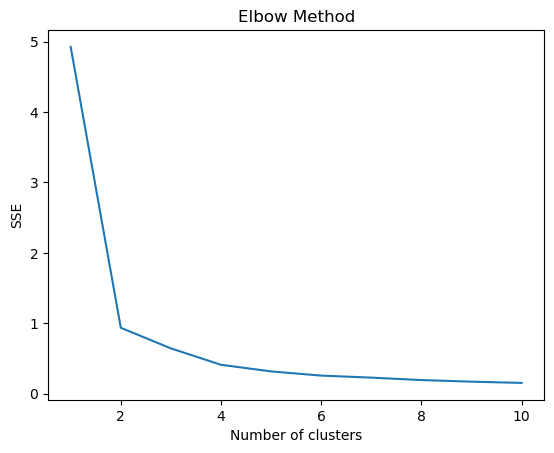

In [148]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


# Insights:
Optimal Number of Clusters: The elbow method helps in determining the optimal number of clusters (k) for KMeans clustering. The "elbow" point in the plot indicates the value of k where the SSE (Sum of Squared Errors) starts to diminish at a slower rate.
Cluster Analysis: Identifying the optimal number of clusters is crucial for effective segmentation of users based on their engagement metrics. Proper clustering can reveal distinct user groups with similar behaviors.
Data Segmentation: The insights from the elbow method can guide the segmentation of users into meaningful clusters, allowing for targeted marketing strategies and personalized service offerings.
Resource Allocation: Understanding the optimal number of clusters can help in allocating resources efficiently to different user segments, ensuring that each group receives appropriate attention and services.
Model Performance: Using the optimal number of clusters improves the performance of the KMeans model, leading to more accurate and meaningful segmentation results.

# Task 3 Experience Analysis

 # 3.1 : Group by Customer ID (MSISDN/Number)

Group the data by the MSISDN/Number column to aggregate information per customer.

In [212]:
# Group by customer ID and calculate averages
aggregated_data = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': 'first'
}).reset_index()


# Calculate Average TCP Retransmission and Average RTT

Calculate the average TCP retransmission and average RTT for each customer.

In [161]:
# Calculate the average TCP retransmission and average RTT
aggregated_data['Avg TCP Retransmission'] = (aggregated_data['TCP DL Retrans. Vol (Bytes)'] + aggregated_data['TCP UL Retrans. Vol (Bytes)']) / 2
aggregated_data['Avg RTT'] = (aggregated_data['Avg RTT DL (ms)'] + aggregated_data['Avg RTT UL (ms)']) / 2


# Calculate Average Throughput

Calculate the average throughput for each customer.

In [176]:
# Calculate the average throughput
aggregated_data['Avg Throughput'] = (aggregated_data['Avg Bearer TP DL (kbps)'] + aggregated_data['Avg Bearer TP UL (kbps)']) / 2


# Select Relevant Columns

Select the relevant columns for the final aggregated data.

In [165]:
# Select relevant columns
aggregated_data = aggregated_data[['MSISDN/Number', 'Avg TCP Retransmission', 'Avg RTT', 'Handset Type', 'Avg Throughput']]
aggregated_data

,MSISDN/Number,Avg TCP Retransmission,Avg RTT,Handset Type,Avg Throughput
0,1.000000e+00,4.912891e+06,143.659944,undefined,8472.403846
1,3.360100e+10,1.000000e+00,23.000000,Huawei P20 Lite Huawei Nova 3E,38.000000
2,3.360100e+10,1.000000e+00,15.500000,Apple iPhone 7 (A1778),49.500000
3,3.360100e+10,1.000000e+00,1.000000,undefined,48.500000
4,3.360101e+10,5.335000e+02,42.000000,Apple iPhone 5S (A1457),124.000000
...,...,...,...,...,...
106852,3.379000e+10,1.090225e+05,26.000000,Huawei Honor 9 Lite,5182.500000
106853,3.379000e+10,1.000000e+00,20.000000,Apple iPhone 8 Plus (A1897),58.000000
106854,3.197021e+12,1.000000e+00,1.000000,Quectel Wireless. Quectel Ec25-E,0.500000
106855,3.370000e+14,1.000000e+00,1.000000,Huawei B525S-23A,16.500000


# Display the Aggregated Data

Display the first few rows of the aggregated data to verify the results.

In [164]:
# Display the aggregated data
print(aggregated_data.head())


   MSISDN/Number  Avg TCP Retransmission     Avg RTT  \
0   1.000000e+00            4.912891e+06  143.659944   
1   3.360100e+10            1.000000e+00   23.000000   
2   3.360100e+10            1.000000e+00   15.500000   
3   3.360100e+10            1.000000e+00    1.000000   
4   3.360101e+10            5.335000e+02   42.000000   

                     Handset Type  Avg Throughput  
0                       undefined     8472.403846  
1  Huawei P20 Lite Huawei Nova 3E       38.000000  
2          Apple iPhone 7 (A1778)       49.500000  
3                       undefined       48.500000  
4         Apple iPhone 5S (A1457)      124.000000  


# Task 3.2

# Compute Top, Bottom, and Most Frequent Values
For each metric (TCP, RTT, Throughput), compute the required values

In [187]:
# Top 10 TCP values
top_tcp = df['TCP DL Retrans. Vol (Bytes)'].nlargest(10)

# Bottom 10 TCP values
bottom_tcp = df['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)

# Most frequent TCP values
most_frequent_tcp = df['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10)

# Top 10 RTT values (using Avg RTT DL (ms))
top_rtt = df['Avg RTT DL (ms)'].nlargest(10)

# Bottom 10 RTT values (using Avg RTT DL (ms))
bottom_rtt = df['Avg RTT DL (ms)'].nsmallest(10)

# Most frequent RTT values (using Avg RTT DL (ms))
most_frequent_rtt = df['Avg RTT DL (ms)'].value_counts().head(10)

# Top 10 Throughput values (using Avg Bearer TP DL (kbps))
top_throughput = df['Avg Bearer TP DL (kbps)'].nlargest(10)

# Bottom 10 Throughput values (using Avg Bearer TP DL (kbps))
bottom_throughput = df['Avg Bearer TP DL (kbps)'].nsmallest(10)

# Most frequent Throughput values (using Avg Bearer TP DL (kbps))
most_frequent_throughput = df['Avg Bearer TP DL (kbps)'].value_counts().head(10)


# Display the Results/
Print or save the results to a file.

In [189]:
# Display results
print("Top 10 TCP values:\n", top_tcp)
print("Bottom 10 TCP values:\n", bottom_tcp)
print("Most frequent TCP values:\n", most_frequent_tcp)

print("Top 10 RTT values:\n", top_rtt)
print("Bottom 10 RTT values:\n", bottom_rtt)
print("Most frequent RTT values:\n", most_frequent_rtt)

print("Top 10 Throughput values:\n", top_throughput)
print("Bottom 10 Throughput values:\n", bottom_throughput)
print("Most frequent Throughput values:\n", most_frequent_throughput)


Top 10 TCP values:
 77950     4.294426e+09
135677    4.291380e+09
34636     4.289877e+09
140797    4.289488e+09
3741      4.288060e+09
119667    4.275259e+09
39608     4.268432e+09
76971     4.259997e+09
59011     4.256650e+09
41182     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 10 TCP values:
 0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
8     1.0
10    1.0
12    1.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most frequent TCP values:
 TCP DL Retrans. Vol (Bytes)
1.0       88146
1330.0      433
2660.0      219
38.0        200
92.0        192
1318.0      156
543.0       133
3990.0      114
76.0        108
5320.0      102
Name: count, dtype: int64
Top 10 RTT values:
 30155     96923.0
29916     64640.0
17894     55811.0
5963      54847.0
22839     26971.0
23442     26250.0
1361      25873.0
81256     25602.0
97312     25374.0
100575    24733.0
Name: Avg RTT DL (ms), dtype: float64
Bottom 10 RTT values:
 42602     0.0
52217     0

# task 3.3 compute $ report

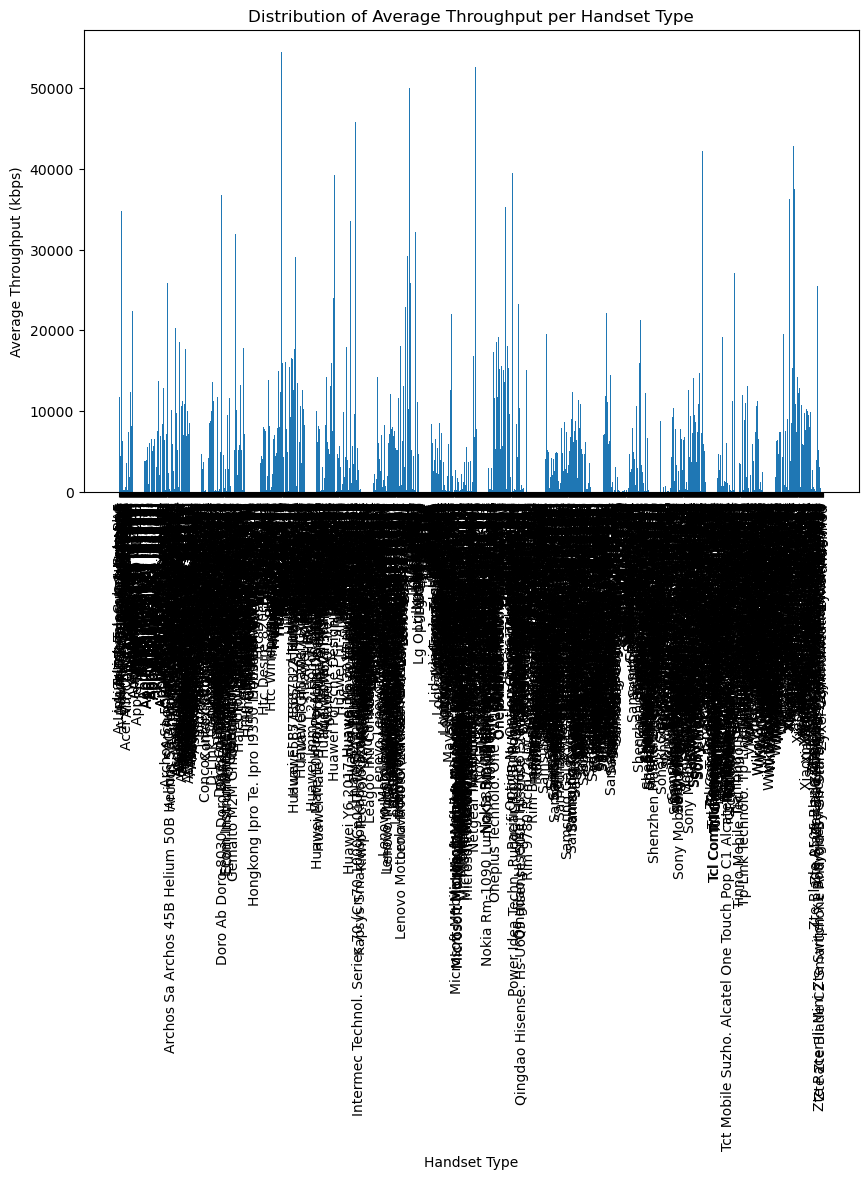

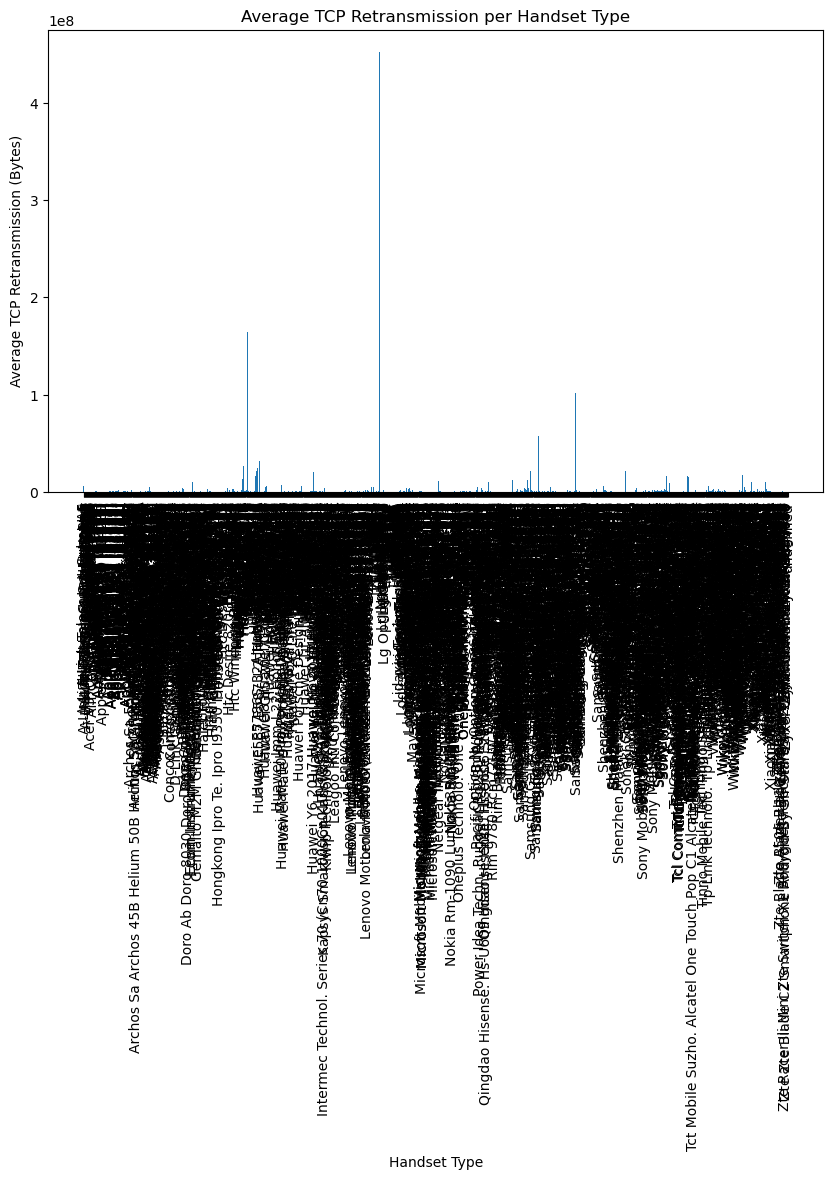

In [199]:
# Task 3.3a: Distribution of Average Throughput per Handset Type
df['Avg Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
throughput_per_handset = df.groupby('Handset Type')['Avg Throughput'].mean().reset_index()

# Convert 'Handset Type' to string type for plotting
throughput_per_handset['Handset Type'] = throughput_per_handset['Handset Type'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(throughput_per_handset['Handset Type'], throughput_per_handset['Avg Throughput'])
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.title('Distribution of Average Throughput per Handset Type')
plt.xticks(rotation=90)
plt.show()

# Task 3.3b: Average TCP Retransmission View per Handset Type
df['Avg TCP Retransmission'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']) / 2
tcp_retransmission_per_handset = df.groupby('Handset Type')['Avg TCP Retransmission'].mean().reset_index()

# Convert 'Handset Type' to string type for plotting
tcp_retransmission_per_handset['Handset Type'] = tcp_retransmission_per_handset['Handset Type'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(tcp_retransmission_per_handset['Handset Type'], tcp_retransmission_per_handset['Avg TCP Retransmission'])
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission (Bytes)')
plt.title('Average TCP Retransmission per Handset Type')
plt.xticks(rotation=90)
plt.show()


# Insights:
# Distribution of Average Throughput per Handset Type:
Performance Variability: The bar chart shows the average throughput (in kbps) for different handset types. This variability indicates that some handsets perform better in terms of data throughput than others.
High-Performance Handsets: Handsets with higher average throughput are likely to provide a better user experience, especially for data-intensive applications like streaming and gaming.
Optimization Opportunities: Identifying handsets with lower average throughput can help in targeting optimization efforts to improve performance for these devices.
User Satisfaction: Ensuring high throughput for popular handsets can enhance user satisfaction and reduce churn rates, as users are more likely to stay with a service that provides a good experience on their devices.
Average TCP Retransmission per Handset Type:
Network Reliability: The bar chart shows the average TCP retransmission volume (in Bytes) for different handset types. High retransmission rates can indicate network reliability issues or poor handset performance.
Handset Quality: Handsets with lower average TCP retransmission rates are likely to provide a more reliable and stable network experience for users.
Troubleshooting: Identifying handsets with high retransmission rates can help in troubleshooting and addressing specific issues related to these devices.
Service Improvement: Reducing TCP retransmission rates across all handsets can improve overall network performance and user experience, leading to higher satisfaction and retention rates.

# task 3.4 User Experiace clustering

         MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  \
Cluster                                                    
0         3.367902e+10        78.263977        26.225896   
1         4.685188e+10        99.133034        11.538860   
2         3.368364e+10       104.547799        39.244130   

         Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
Cluster                                                     
0                   52244.949870              8292.446341   
1                    5445.126399               489.130936   
2                   62838.408386              8595.817715   

         TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  
Cluster                                                            
0                       2.248159e+07                 1.431290e+06  
1                       1.257422e+06                 4.509234e+04  
2                       2.224265e+09                 1.141271e+06  


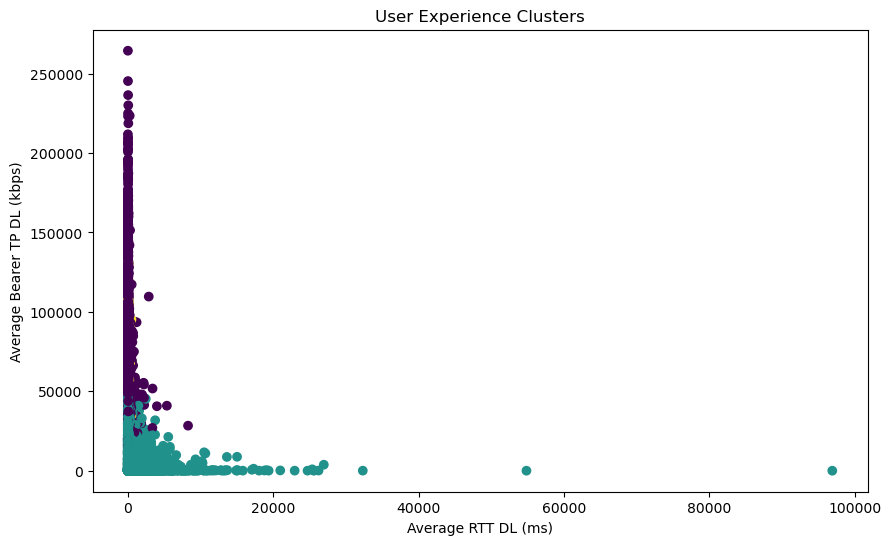

In [203]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(experience_metrics.drop(columns=['MSISDN/Number']))
# Interpret Clusters
cluster_summary = experience_metrics.groupby('Cluster').mean()
print(cluster_summary)
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(experience_metrics['Avg RTT DL (ms)'], experience_metrics['Avg Bearer TP DL (kbps)'], c=experience_metrics['Cluster'])
plt.xlabel('Average RTT DL (ms)')
plt.ylabel('Average Bearer TP DL (kbps)')
plt.title('User Experience Clusters')
plt.show()


# Interpretation
Cluster 0: Users in this cluster might have moderate RTT and throughput values, indicating average network performance.
Cluster 1: This cluster could represent users with high RTT and low throughput, indicating poor network performance.
Cluster 2: Users in this cluster might have low RTT and high throughput, indicating good network performance.

# Task 4 Satisfaction Analysis

4.1 python program to assign

In [222]:
df1.head(2)

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)


In [224]:
# Extract relevant features
engagement_features = df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']]
experience_features = df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]


In [225]:
from sklearn.cluster import KMeans

# Perform clustering to find less engaged and worst experience clusters
kmeans_engagement = KMeans(n_clusters=2, random_state=0).fit(engagement_features)
kmeans_experience = KMeans(n_clusters=2, random_state=0).fit(experience_features)

# Assign clusters
df['engagement_cluster'] = kmeans_engagement.labels_
df['experience_cluster'] = kmeans_experience.labels_


In [226]:
import numpy as np

# Calculate Euclidean distance to the less engaged cluster centroid
less_engaged_centroid = kmeans_engagement.cluster_centers_[0]
df['engagement_score'] = np.linalg.norm(engagement_features - less_engaged_centroid, axis=1)

# Calculate Euclidean distance to the worst experience cluster centroid
worst_experience_centroid = kmeans_experience.cluster_centers_[0]
df['experience_score'] = np.linalg.norm(experience_features - worst_experience_centroid, axis=1)


In [227]:
# Calculate satisfaction score as the average of engagement and experience scores
df['satisfaction_score'] = df[['engagement_score', 'experience_score']].mean(axis=1)


In [228]:
# task 4.2

# Report top 10 satisfied customers
top_10_satisfied_customers = df.nlargest(10, 'satisfaction_score')
print("Top 10 satisfied customers:")
print(top_10_satisfied_customers)


Top 10 satisfied customers:
           Bearer Id          Start  Start ms           End  End ms  \
120876  1.304240e+19   4/28/19 3:57     471.0  4/29/19 3:57   389.0   
143670  7.277830e+18   4/29/19 5:01     659.0  4/30/19 8:16   261.0   
141250  7.277830e+18   4/29/19 3:58     806.0  4/30/19 3:40   490.0   
149616  7.277830e+18   4/29/19 7:25     359.0  4/30/19 0:28   388.0   
92177   7.277830e+18  4/27/19 15:13     871.0  4/28/19 0:34   252.0   
117776  1.304240e+19   4/28/19 2:10     283.0  4/29/19 2:10   381.0   
115836  1.304240e+19   4/28/19 1:09     836.0  4/29/19 1:09   749.0   
89567   7.277830e+18  4/27/19 14:03     976.0  4/28/19 0:18   912.0   
116550  7.277830e+18   4/28/19 1:33      33.0  4/29/19 1:47   500.0   
41551   1.304240e+19   4/25/19 4:41     864.0  4/26/19 4:41   760.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
120876    86399.0  2.082017e+14   3.366117e+10  8.637690e+13   
143670    98095.0  2.082010e+14   3.367251e+10  3.579881e+13  

In [229]:
# task 4.3
from sklearn.linear_model import LinearRegression

# Build a regression model to predict satisfaction score
X = df[['engagement_score', 'experience_score']]
y = df['satisfaction_score']
regression_model = LinearRegression().fit(X, y)


In [230]:
# 4.4

# Run k-means clustering on engagement and experience scores
kmeans_scores = KMeans(n_clusters=2, random_state=0).fit(df[['engagement_score', 'experience_score']])
df['score_cluster'] = kmeans_scores.labels_


In [231]:
# 4.5

# Aggregate average satisfaction and experience score per cluster
cluster_aggregation = df.groupby('score_cluster')[['satisfaction_score', 'experience_score']].mean()
print("Cluster aggregation:")
print(cluster_aggregation)


Cluster aggregation:
               satisfaction_score  experience_score
score_cluster                                      
0                     3312.130407       6520.009989
1                    28705.238421      57356.104468


In [ ]:
# SQL

In [234]:
pip install pymysql

In [236]:
pip install pyodbc sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [244]:
from sqlalchemy import create_engine

# Define SQL Server connection details
server = 'DESKTOP-RBIQ11J\SQLEXPRESS01'  # The name of your server
database = 'master'  # The database you want to connect to

# Create a connection string with a trusted connection
connection_url = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

# Create an engine
engine = create_engine(connection_url)

# Transfer data to SQL Server
table_name = 'df_dataset'
df_cleaned.to_sql(table_name, engine, if_exists='replace', index=False)

# Confirm completion
print(f"Dataset transferred to SQL Server table: {table_name}")

# Dispose the engine
engine.dispose()

ProgrammingError: (pyodbc.ProgrammingError) ('42S21', "[42S21] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Column names in each table must be unique. Column name 'engagement_cluster' in table 'df_dataset' is specified more than once. (2705) (SQLExecDirectW)")
[SQL: 
CREATE TABLE df_dataset (
	[Bearer_Id] FLOAT(53) NULL, 
	[Start] VARCHAR(max) NULL, 
	[Start_ms] FLOAT(53) NULL, 
	[End] VARCHAR(max) NULL, 
	[End_ms] FLOAT(53) NULL, 
	[Dur_ms] FLOAT(53) NULL, 
	[IMSI] FLOAT(53) NULL, 
	[MSISDNNumber] FLOAT(53) NULL, 
	[IMEI] FLOAT(53) NULL, 
	[Last_Location_Name] VARCHAR(max) NULL, 
	[Avg_RTT_DL_ms] FLOAT(53) NULL, 
	[Avg_RTT_UL_ms] FLOAT(53) NULL, 
	[Avg_Bearer_TP_DL_kbps] FLOAT(53) NULL, 
	[Avg_Bearer_TP_UL_kbps] FLOAT(53) NULL, 
	[TCP_DL_Retrans_Vol_Bytes] FLOAT(53) NULL, 
	[TCP_UL_Retrans_Vol_Bytes] FLOAT(53) NULL, 
	[DL_TP__50_Kbps_] FLOAT(53) NULL, 
	[50_Kbps__DL_TP__250_Kbps_] FLOAT(53) NULL, 
	[250_Kbps__DL_TP__1_Mbps_] FLOAT(53) NULL, 
	[DL_TP__1_Mbps_] FLOAT(53) NULL, 
	[UL_TP__10_Kbps_] FLOAT(53) NULL, 
	[10_Kbps__UL_TP__50_Kbps_] FLOAT(53) NULL, 
	[50_Kbps__UL_TP__300_Kbps_] FLOAT(53) NULL, 
	[UL_TP__300_Kbps_] FLOAT(53) NULL, 
	[HTTP_DL_Bytes] FLOAT(53) NULL, 
	[HTTP_UL_Bytes] FLOAT(53) NULL, 
	[Activity_Duration_DL_ms] FLOAT(53) NULL, 
	[Activity_Duration_UL_ms] FLOAT(53) NULL, 
	[Dur_ms1] FLOAT(53) NULL, 
	[Handset_Manufacturer] VARCHAR(max) NULL, 
	[Handset_Type] VARCHAR(max) NULL, 
	[Nb_of_sec_with_125000B__Vol_DL] FLOAT(53) NULL, 
	[Nb_of_sec_with_1250B__Vol_UL__6250B] FLOAT(53) NULL, 
	[Nb_of_sec_with_31250B__Vol_DL__125000B] FLOAT(53) NULL, 
	[Nb_of_sec_with_37500B__Vol_UL] FLOAT(53) NULL, 
	[Nb_of_sec_with_6250B__Vol_DL__31250B] FLOAT(53) NULL, 
	[Nb_of_sec_with_6250B__Vol_UL__37500B] FLOAT(53) NULL, 
	[Nb_of_sec_with_Vol_DL__6250B] FLOAT(53) NULL, 
	[Nb_of_sec_with_Vol_UL__1250B] FLOAT(53) NULL, 
	[Social_Media_DL_Bytes] FLOAT(53) NULL, 
	[Social_Media_UL_Bytes] FLOAT(53) NULL, 
	[Google_DL_Bytes] FLOAT(53) NULL, 
	[Google_UL_Bytes] FLOAT(53) NULL, 
	[Email_DL_Bytes] FLOAT(53) NULL, 
	[Email_UL_Bytes] FLOAT(53) NULL, 
	[Youtube_DL_Bytes] FLOAT(53) NULL, 
	[Youtube_UL_Bytes] FLOAT(53) NULL, 
	[Netflix_DL_Bytes] FLOAT(53) NULL, 
	[Netflix_UL_Bytes] FLOAT(53) NULL, 
	[Gaming_DL_Bytes] FLOAT(53) NULL, 
	[Gaming_UL_Bytes] FLOAT(53) NULL, 
	[Other_DL_Bytes] FLOAT(53) NULL, 
	[Other_UL_Bytes] FLOAT(53) NULL, 
	[Total_UL_Bytes] FLOAT(53) NULL, 
	[Total_DL_Bytes] FLOAT(53) NULL, 
	[Total_Data_Bytes] FLOAT(53) NULL, 
	[Avg_Throughput] FLOAT(53) NULL, 
	[Avg_TCP_Retransmission] FLOAT(53) NULL, 
	[Engagement_Cluster] INTEGER NULL, 
	engagement_cluster INTEGER NULL, 
	experience_cluster INTEGER NULL, 
	engagement_score FLOAT(53) NULL, 
	experience_score FLOAT(53) NULL, 
	satisfaction_score FLOAT(53) NULL, 
	score_cluster INTEGER NULL
)

]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [243]:
# Clean column names to make them SQL-friendly
df_cleaned = df.copy()
df_cleaned.columns = df_cleaned.columns.str.strip().str.replace(' ', '_').str.replace(r'\W', '', regex=True)

# Display the cleaned dataset
print(df_cleaned.head())


      Bearer_Id          Start  Start_ms            End  End_ms     Dur_ms  \
0  1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0  1823652.0   
1  1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0  1365104.0   
2  1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0  1361762.0   
3  1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0  1321509.0   
4  1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0  1089009.0   

           IMSI  MSISDNNumber          IMEI Last_Location_Name  Avg_RTT_DL_ms  \
0  2.082014e+14  3.366496e+10  3.552121e+13        9.16457E+15           42.0   
1  2.082019e+14  3.368185e+10  3.579401e+13            L77566A           65.0   
2  2.082003e+14  3.376063e+10  3.528151e+13            D42335A            1.0   
3  2.082014e+14  3.375034e+10  3.535661e+13            T21824A            1.0   
4  2.082014e+14  3.369980e+10  3.540701e+13            D88865A            1.0   

   Avg_RTT_UL_ms  Avg_Bearer_TP_DL_kbps  Avg

In [248]:
# Optional: View a sample
print("Main Dataset:")
print(df.head(2))

print("\nField Descriptions Dataset:")
print(df1.head(2))

Main Dataset:
      Bearer Id         Start  Start ms            End  End ms  Dur. (ms)  \
0  1.311450e+19  4/4/19 12:01     770.0  4/25/19 14:35   662.0  1823652.0   
1  1.311450e+19  4/9/19 13:04     235.0   4/25/19 8:15   606.0  1365104.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  \
0  2.082014e+14   3.366496e+10  3.552121e+13        9.16457E+15   
1  2.082019e+14   3.368185e+10  3.579401e+13            L77566A   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0             42.0              5.0                     23.0   
1             65.0              5.0                     16.0   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                     44.0                          1.0   
1                     26.0                          1.0   

   TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
0                          1.0                100.0   
1                          1.0                100.0   

   50 Kbps < DL

In [249]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

# Convert relevant columns to numeric
engagement_columns = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
                      'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
                      'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
experience_columns = engagement_columns  # Same columns in this case

for col in engagement_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group by customer ID and calculate means
aggregated_data = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).reset_index()


In [250]:
# Normalize engagement metrics
scaler = StandardScaler()
normalized_engagement = scaler.fit_transform(aggregated_data[engagement_columns].fillna(0))

# Engagement clustering
kmeans_eng = KMeans(n_clusters=3, random_state=42)
aggregated_data['engagement_cluster'] = kmeans_eng.fit_predict(normalized_engagement)

# Identify least engaged cluster
low_eng_cluster = aggregated_data.groupby('engagement_cluster')[engagement_columns].mean().mean(axis=1).idxmin()

# Engagement score
aggregated_data['engagement_score'] = cdist(normalized_engagement,
                                            kmeans_eng.cluster_centers_[low_eng_cluster].reshape(1, -1),
                                            metric='euclidean').flatten()

# Normalize experience metrics
normalized_experience = scaler.fit_transform(aggregated_data[experience_columns].fillna(0))

# Experience clustering
kmeans_exp = KMeans(n_clusters=3, random_state=42)
aggregated_data['experience_cluster'] = kmeans_exp.fit_predict(normalized_experience)

# Identify worst experience cluster
bad_exp_cluster = aggregated_data.groupby('experience_cluster')[experience_columns].mean().mean(axis=1).idxmax()

# Experience score
aggregated_data['experience_score'] = cdist(normalized_experience,
                                            kmeans_exp.cluster_centers_[bad_exp_cluster].reshape(1, -1),
                                            metric='euclidean').flatten()

# Satisfaction score
aggregated_data['satisfaction_score'] = (aggregated_data['engagement_score'] + aggregated_data['experience_score']) / 2


In [251]:
# Final export DataFrame
final_df = aggregated_data[['MSISDN/Number', 'engagement_score', 'experience_score', 'satisfaction_score']]
final_df.columns = ['user_id', 'engagement_score', 'experience_score', 'satisfaction_score']


In [253]:
pip install mysql

In [257]:
from sqlalchemy import create_engine

# SQL Server connection
server = 'DESKTOP-RBIQ11J\SQLEXPRESS01'  # Your server name
database = 'master'                      # Your target database
driver = 'ODBC Driver 17 for SQL Server'

# Connection string
connection_url = f"mssql+pyodbc://@{server}/{database}?driver={driver}&trusted_connection=yes"
engine = create_engine(connection_url)

# Export to SQL Server table
final_df.to_sql('user_scores', con=engine, if_exists='replace', index=False)

print("✅ Data exported to SQL Server table: user_scores")


✅ Data exported to SQL Server table: user_scores


In [6]:
#pip install mlflow flask scikit-learn pandas
